In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from collections import Counter

In [4]:
data=pd.read_csv("indian_liver_patient.csv")

In [5]:
data.info()
data.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


Age Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
578   60   Male              0.5               0.1                   500   
579   40   Male              0.6               0.1                    98   
580   52   Male              0.8               0.2                   245   
581   31   Male              1.3               0.5                   184   
582   38   Male              1.0               0.3                   216   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
578                        20                          34             5.9   
579                        35                          31             6.0   
580                        48                          49             6.4   
581                        29                          32             6.8   
582                        21                          24             7.3   

     Albumin  Albumin_and_Globulin_Ratio  Dataset  
578      1.6                        0.37        2  
579      3.2                        1.10        1  
580      3.2                        1.00        1  
581      3.4                        1.00        1  
582      4.4                        1.50        2

In [6]:
data.Gender = [1 if each == "Male" else 0 for each in data.Gender]
data['Gender'] = data['Gender'].astype('int')
H=data[data.Dataset==1]
HD=data[data.Dataset==2]
H.info()
HD.info()

<class 'pandas.core.frame.DataFrame'>
Index: 416 entries, 0 to 581
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         416 non-null    int64  
 1   Gender                      416 non-null    int32  
 2   Total_Bilirubin             416 non-null    float64
 3   Direct_Bilirubin            416 non-null    float64
 4   Alkaline_Phosphotase        416 non-null    int64  
 5   Alamine_Aminotransferase    416 non-null    int64  
 6   Aspartate_Aminotransferase  416 non-null    int64  
 7   Total_Protiens              416 non-null    float64
 8   Albumin                     416 non-null    float64
 9   Albumin_and_Globulin_Ratio  414 non-null    float64
 10  Dataset                     416 non-null    int64  
dtypes: float64(5), int32(1), int64(5)
memory usage: 37.4 KB
<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, 8 to 582
Data columns (total 11 columns)

In [28]:
from sklearn.model_selection import train_test_split
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols.remove('Dataset')
X = data[numeric_cols]
y = data['Dataset']

# → Eksik değeri olan tüm satırları çıkar
mask = X.notna().all(axis=1)    # X’in tüm sütunlarında NaN olmayan satırlar
X_clean = X[mask]
y_clean = y[mask]

H.info()
HD.info()
x.info()
x = (X_clean - np.min(X_clean))/(np.max(X_clean)-np.min(X_clean))
x_train, x_test, y_train, y_test = train_test_split(X_clean,y_clean,test_size = 0.3,random_state=1)
print("SMOTE öncesi eğitim dağılımı:", Counter(y_clean))

<class 'pandas.core.frame.DataFrame'>
Index: 416 entries, 0 to 581
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         416 non-null    int64  
 1   Gender                      416 non-null    int32  
 2   Total_Bilirubin             416 non-null    float64
 3   Direct_Bilirubin            416 non-null    float64
 4   Alkaline_Phosphotase        416 non-null    int64  
 5   Alamine_Aminotransferase    416 non-null    int64  
 6   Aspartate_Aminotransferase  416 non-null    int64  
 7   Total_Protiens              416 non-null    float64
 8   Albumin                     416 non-null    float64
 9   Albumin_and_Globulin_Ratio  414 non-null    float64
 10  Dataset                     416 non-null    int64  
 11  label                       416 non-null    object 
dtypes: float64(5), int32(1), int64(5), object(1)
memory usage: 40.6+ KB
<class 'pandas.core.frame.Dat

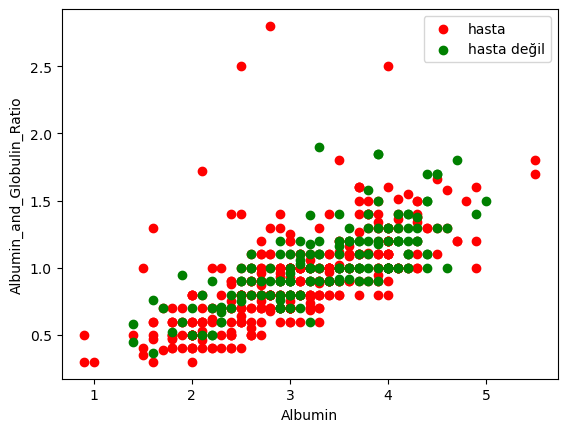

In [8]:
plt.scatter(H.Albumin,H.Albumin_and_Globulin_Ratio,color="red", label="hasta")
plt.scatter(HD.Albumin,HD.Albumin_and_Globulin_Ratio,color="green", label="hasta değil")
plt.xlabel("Albumin")
plt.ylabel("Albumin_and_Globulin_Ratio")
plt.legend()
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_26488\545726310.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  H["label"]  = "hasta"
C:\Users\ASUS\AppData\Local\Temp\ipykernel_26488\545726310.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HD["label"] = "hasta değil"


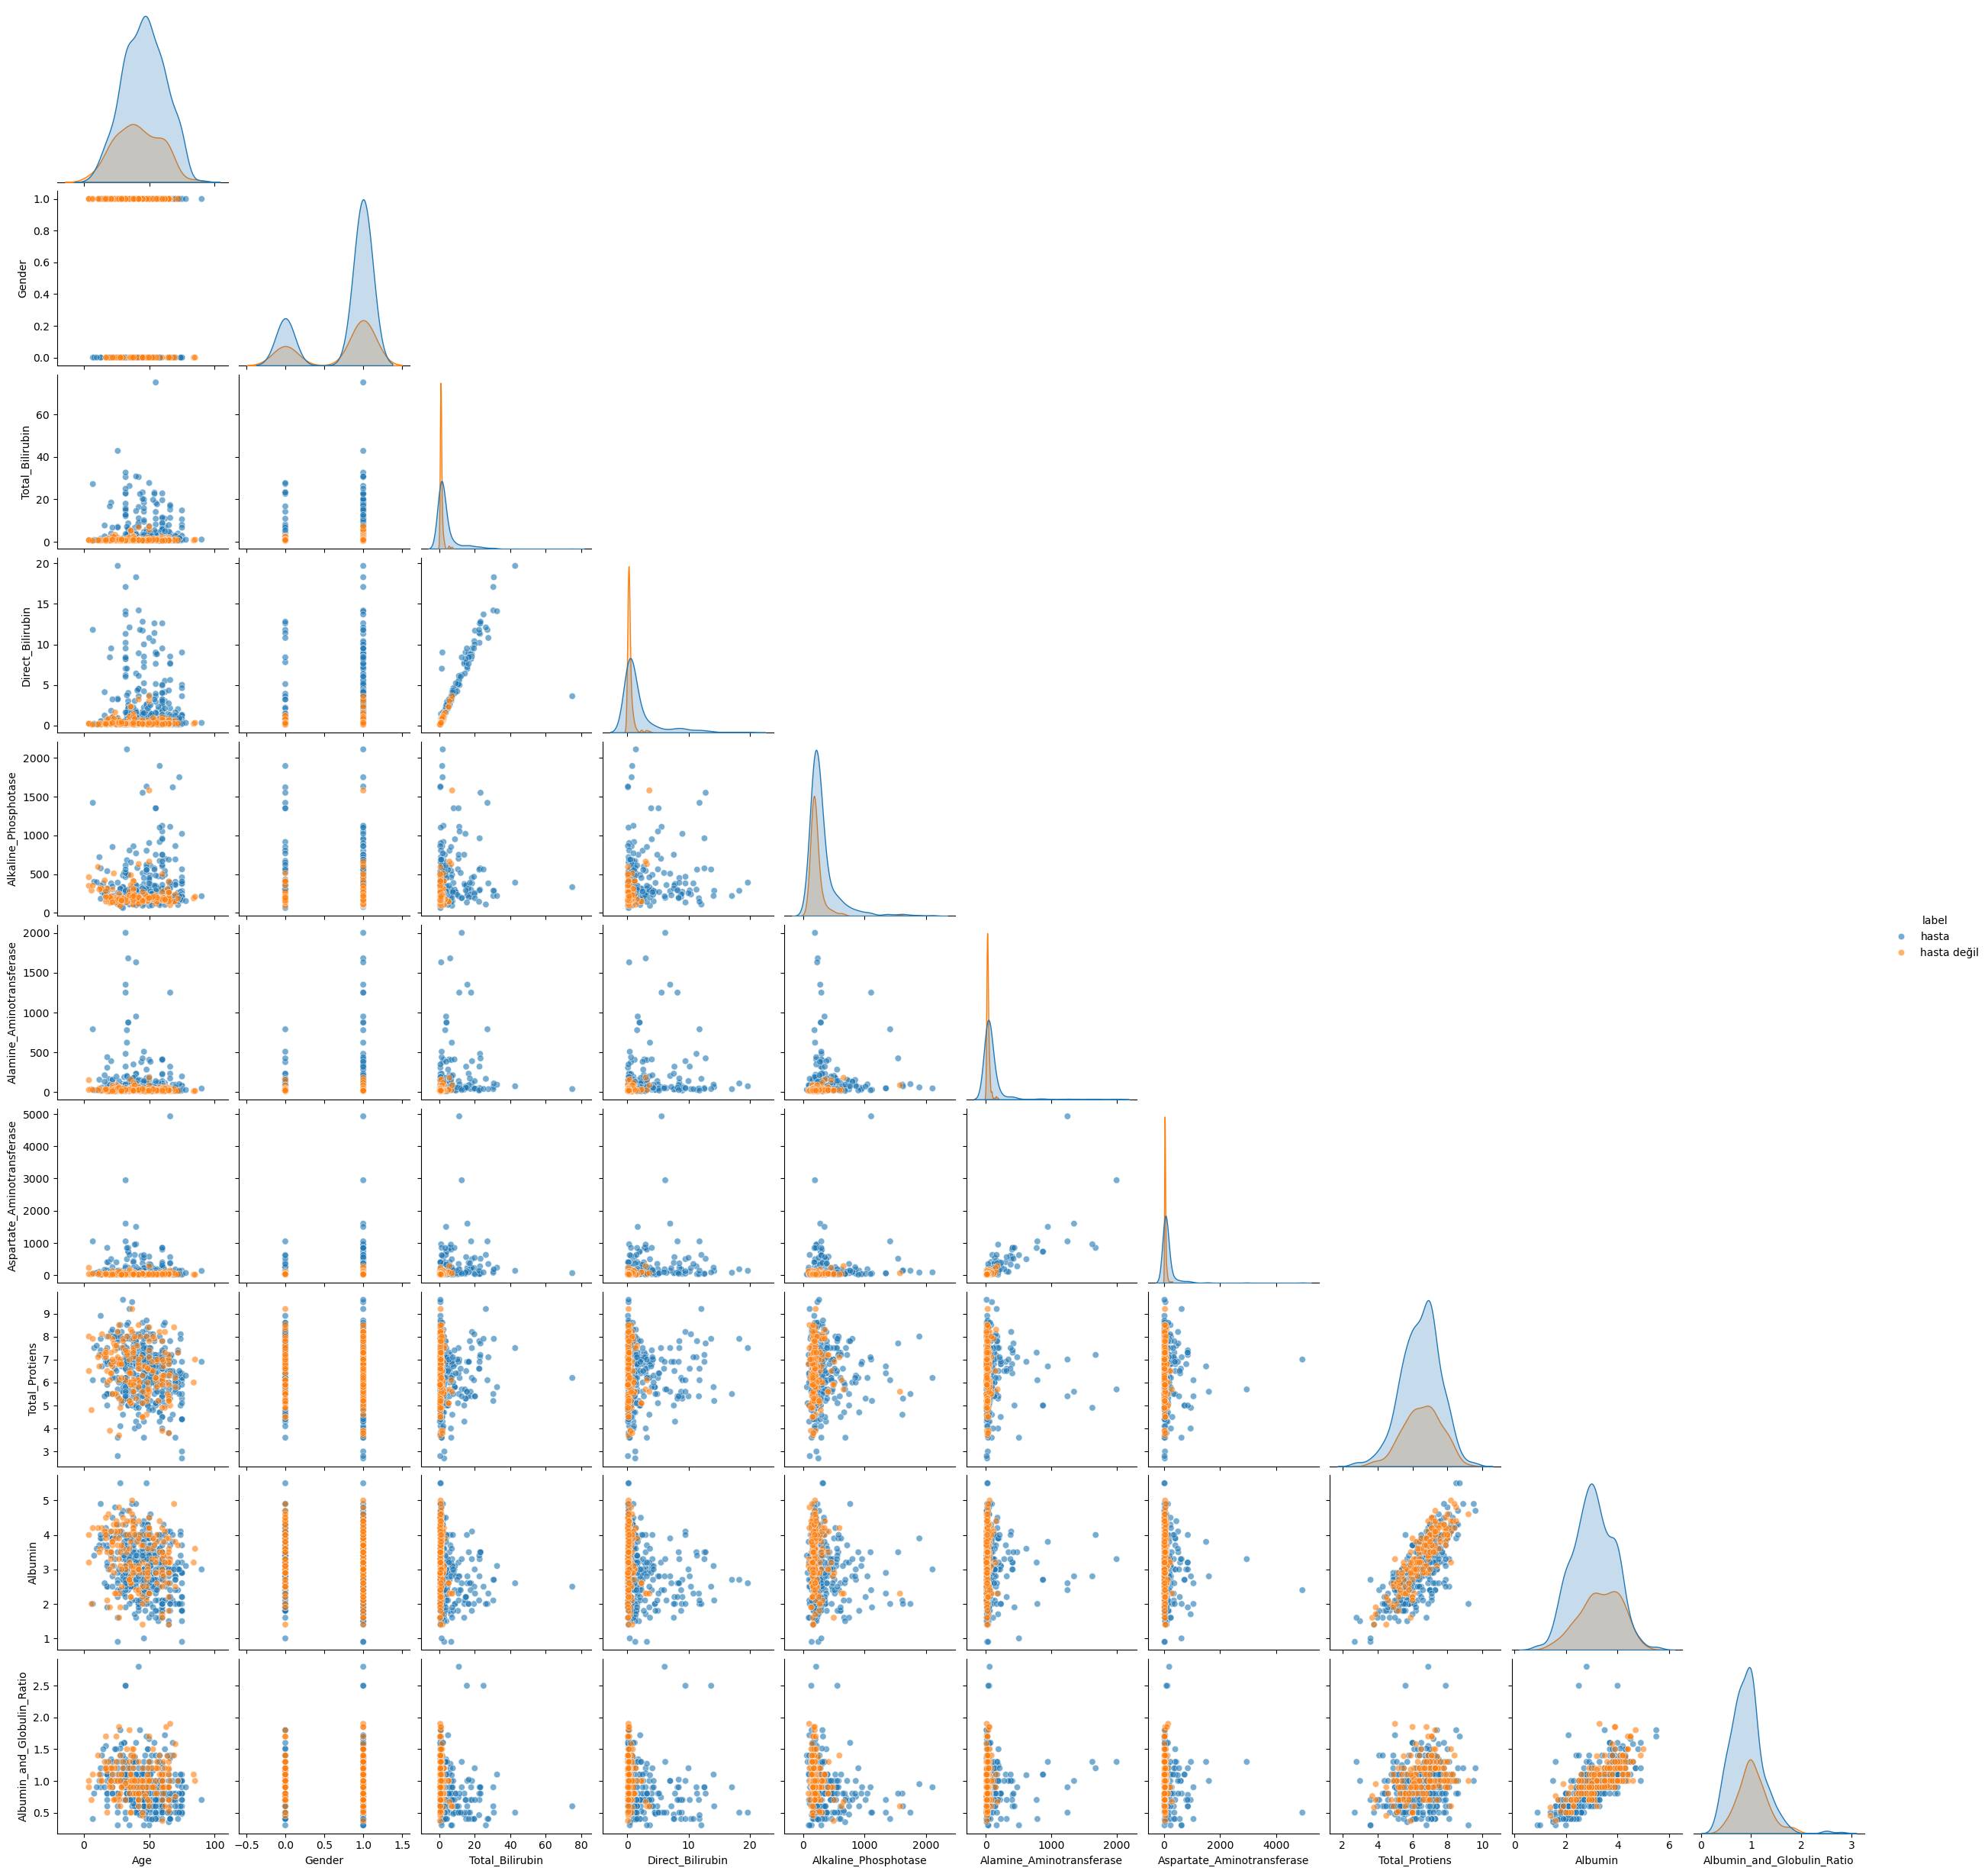

In [9]:
H["label"]  = "hasta"
HD["label"] = "hasta değil"
df = pd.concat([H, HD], ignore_index=True)

# 2) Çiz
sns.pairplot(
    df,
    vars=["Age","Gender","Total_Bilirubin","Direct_Bilirubin","Alkaline_Phosphotase","Alamine_Aminotransferase","Aspartate_Aminotransferase","Total_Protiens","Albumin","Albumin_and_Globulin_Ratio"],
    hue="label",           # rengi hasta/hasta değil'e göre ayarlar
    diag_kind="kde",       # köşedeki dağılımı KDE ile gösterir
    corner=True,           # üst üçgeni gizler
    plot_kws={"alpha":0.6} # noktaları biraz saydam yaparak üst üste binmeyi azaltır
)
plt.show()

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


score:  0.6551724137931034
              precision    recall  f1-score   support

           1       0.78      0.75      0.76       129
           2       0.35      0.38      0.36        45

    accuracy                           0.66       174
   macro avg       0.56      0.56      0.56       174
weighted avg       0.67      0.66      0.66       174



<Axes: >

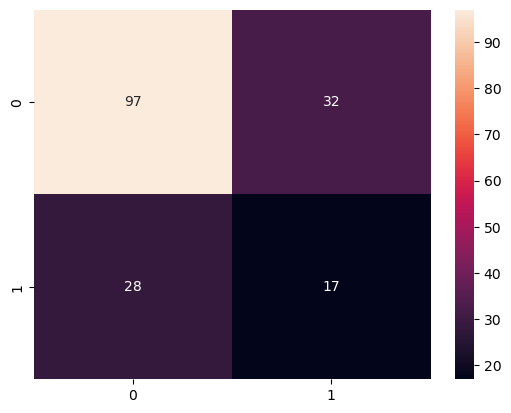

In [10]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
abc= AdaBoostClassifier(n_estimators=100,learning_rate=1.0,random_state=42)
abc.fit(x_train,y_train)
print("score: ",abc.score(x_test,y_test))
prediction = abc.predict(x_test)
cm = confusion_matrix(y_test,prediction)
print(classification_report(y_test, prediction))
sns.heatmap(cm,annot=True,fmt="d") 

score:  0.7528735632183908
              precision    recall  f1-score   support

           1       0.80      0.89      0.84       129
           2       0.53      0.36      0.43        45

    accuracy                           0.75       174
   macro avg       0.67      0.62      0.63       174
weighted avg       0.73      0.75      0.73       174



<Axes: >

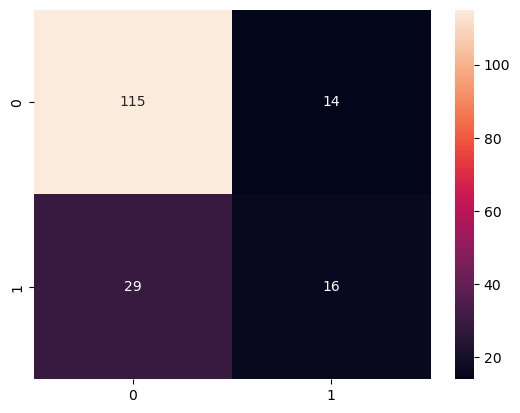

In [11]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
rfc= RandomForestClassifier(n_estimators=100,max_depth=None,random_state=42)
rfc.fit(x_train,y_train)
print("score: ",rfc.score(x_test,y_test))
prediction = rfc.predict(x_test)
cm = confusion_matrix(y_test,prediction)
print(classification_report(y_test, prediction))
sns.heatmap(cm,annot=True,fmt="d") 

score:  0.14942528735632185
              precision    recall  f1-score   support

           0       0.77      0.80      0.79       129
           1       0.37      0.33      0.35        45

    accuracy                           0.68       174
   macro avg       0.57      0.57      0.57       174
weighted avg       0.67      0.68      0.67       174



C:\Users\ASUS\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:09:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


<Axes: >

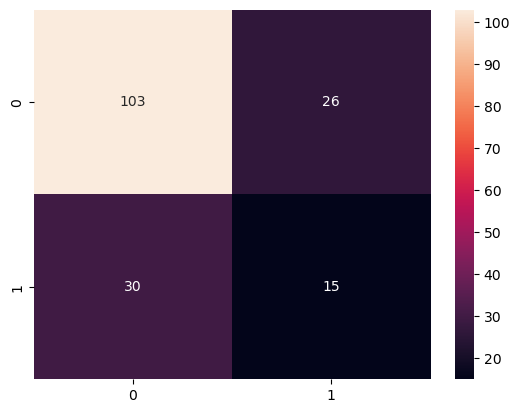

In [30]:

from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)  # 1→0, 2→1
y_test_enc  = le.transform(y_test)
xgb=XGBClassifier(n_estimators=100,learning_rate=0.1,use_label_encoder=False,eval_metric='logloss',random_state=42)
xgb.fit(x_train, y_train_enc)
y_pred = xgb.predict(x_test)
print("score: ",xgb.score(x_test,y_test))
cm = confusion_matrix(y_test_enc,y_pred)
print(classification_report(y_test_enc, y_pred))
sns.heatmap(cm,annot=True,fmt="d")


score:  0.6609195402298851
              precision    recall  f1-score   support

           1       0.80      0.72      0.76       129
           2       0.38      0.49      0.43        45

    accuracy                           0.66       174
   macro avg       0.59      0.60      0.59       174
weighted avg       0.69      0.66      0.67       174



<Axes: >

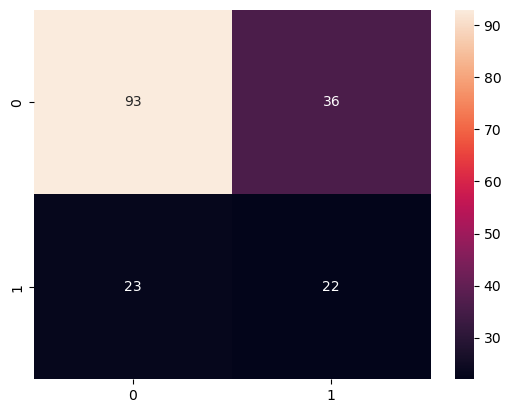

In [32]:

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion="gini")
dt.fit(x_train,y_train)
from sklearn.metrics import classification_report, confusion_matrix
print("score: ",dt.score(x_test,y_test))
prediction = dt.predict(x_test)
cm = confusion_matrix(y_test,prediction)
print(classification_report(y_test, prediction))
sns.heatmap(cm,annot=True,fmt="d") 

score:  0.6724137931034483
              precision    recall  f1-score   support

           1       0.79      0.77      0.78       129
           2       0.38      0.40      0.39        45

    accuracy                           0.67       174
   macro avg       0.58      0.58      0.58       174
weighted avg       0.68      0.67      0.68       174



<Axes: >

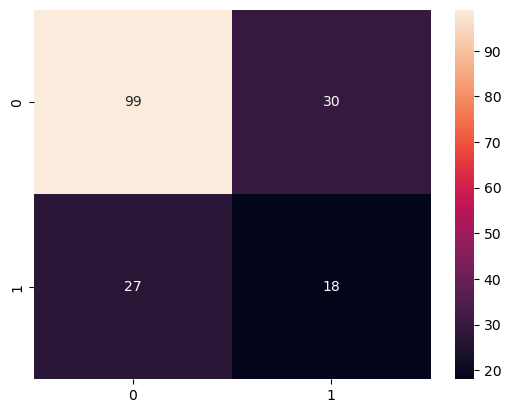

In [33]:
dt2 = DecisionTreeClassifier(criterion="entropy")
dt2.fit(x_train,y_train)
from sklearn.metrics import classification_report, confusion_matrix
print("score: ",dt2.score(x_test,y_test))
prediction = dt2.predict(x_test)
cm = confusion_matrix(y_test,prediction)
print(classification_report(y_test, prediction))
sns.heatmap(cm,annot=True,fmt="d") 

k=1 Uzaklık Yöntemi=euclidean Doğruluk Değeri: 0.6551724137931034 
              precision    recall  f1-score   support

           1       0.79      0.72      0.76       129
           2       0.37      0.47      0.41        45

    accuracy                           0.66       174
   macro avg       0.58      0.59      0.58       174
weighted avg       0.68      0.66      0.67       174



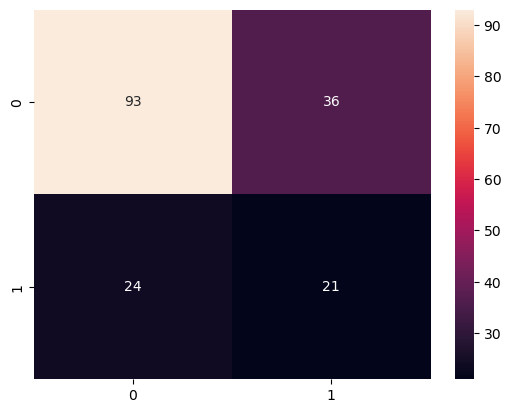

k=3 Uzaklık Yöntemi=euclidean Doğruluk Değeri: 0.6551724137931034 
              precision    recall  f1-score   support

           1       0.77      0.77      0.77       129
           2       0.33      0.33      0.33        45

    accuracy                           0.66       174
   macro avg       0.55      0.55      0.55       174
weighted avg       0.66      0.66      0.66       174



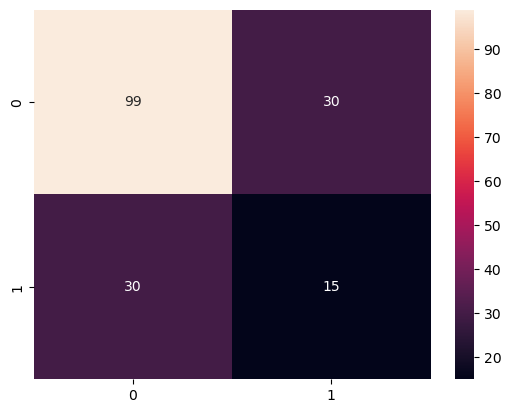

k=5 Uzaklık Yöntemi=euclidean Doğruluk Değeri: 0.6436781609195402 
              precision    recall  f1-score   support

           1       0.76      0.75      0.76       129
           2       0.32      0.33      0.33        45

    accuracy                           0.64       174
   macro avg       0.54      0.54      0.54       174
weighted avg       0.65      0.64      0.65       174



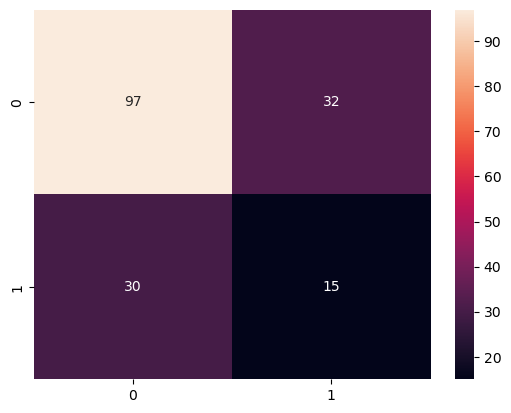

k=7 Uzaklık Yöntemi=euclidean Doğruluk Değeri: 0.6551724137931034 
              precision    recall  f1-score   support

           1       0.78      0.75      0.76       129
           2       0.35      0.38      0.36        45

    accuracy                           0.66       174
   macro avg       0.56      0.56      0.56       174
weighted avg       0.67      0.66      0.66       174



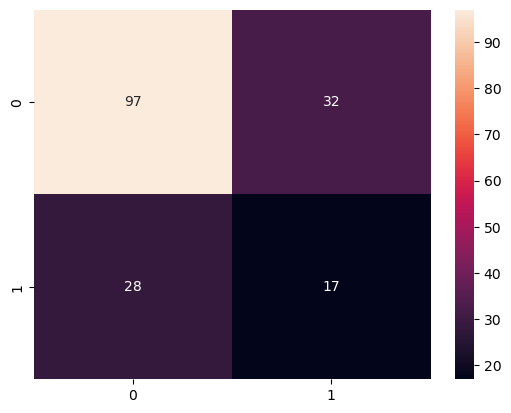

k=9 Uzaklık Yöntemi=euclidean Doğruluk Değeri: 0.6666666666666666 
              precision    recall  f1-score   support

           1       0.78      0.77      0.77       129
           2       0.36      0.38      0.37        45

    accuracy                           0.67       174
   macro avg       0.57      0.57      0.57       174
weighted avg       0.67      0.67      0.67       174



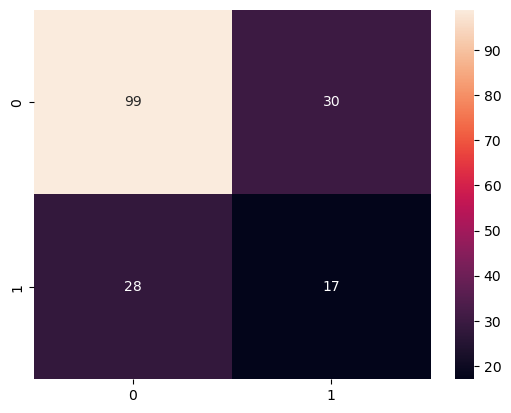

k=11 Uzaklık Yöntemi=euclidean Doğruluk Değeri: 0.6551724137931034 
              precision    recall  f1-score   support

           1       0.75      0.80      0.77       129
           2       0.30      0.24      0.27        45

    accuracy                           0.66       174
   macro avg       0.52      0.52      0.52       174
weighted avg       0.63      0.66      0.64       174



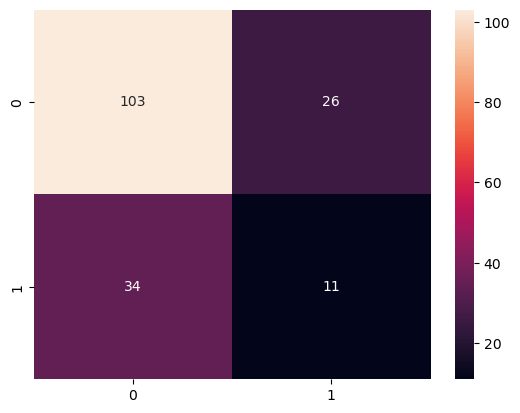

k=13 Uzaklık Yöntemi=euclidean Doğruluk Değeri: 0.6724137931034483 
              precision    recall  f1-score   support

           1       0.76      0.81      0.78       129
           2       0.34      0.29      0.31        45

    accuracy                           0.67       174
   macro avg       0.55      0.55      0.55       174
weighted avg       0.66      0.67      0.66       174



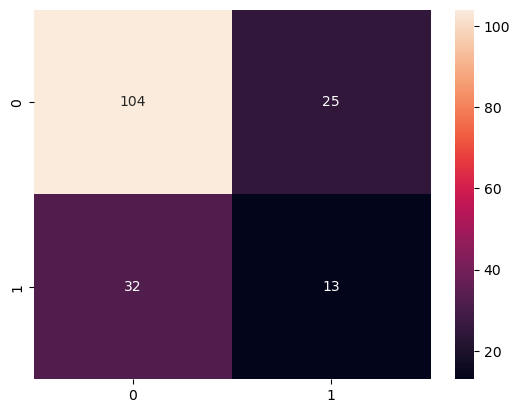

k=15 Uzaklık Yöntemi=euclidean Doğruluk Değeri: 0.6954022988505747 
              precision    recall  f1-score   support

           1       0.78      0.83      0.80       129
           2       0.39      0.31      0.35        45

    accuracy                           0.70       174
   macro avg       0.58      0.57      0.57       174
weighted avg       0.68      0.70      0.68       174



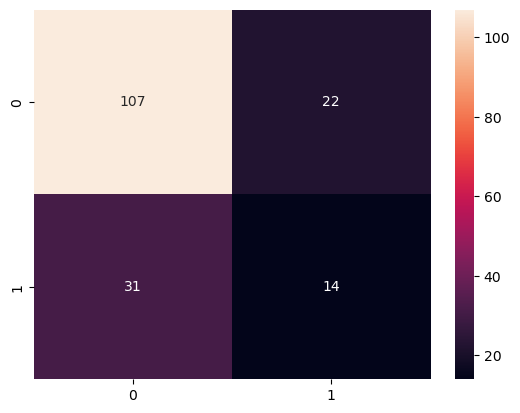

k=17 Uzaklık Yöntemi=euclidean Doğruluk Değeri: 0.6839080459770115 
              precision    recall  f1-score   support

           1       0.77      0.82      0.79       129
           2       0.36      0.29      0.32        45

    accuracy                           0.68       174
   macro avg       0.56      0.56      0.56       174
weighted avg       0.66      0.68      0.67       174



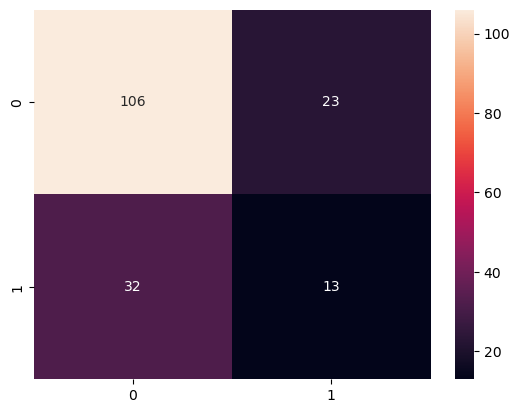

k=19 Uzaklık Yöntemi=euclidean Doğruluk Değeri: 0.6724137931034483 
              precision    recall  f1-score   support

           1       0.77      0.79      0.78       129
           2       0.36      0.33      0.34        45

    accuracy                           0.67       174
   macro avg       0.56      0.56      0.56       174
weighted avg       0.67      0.67      0.67       174



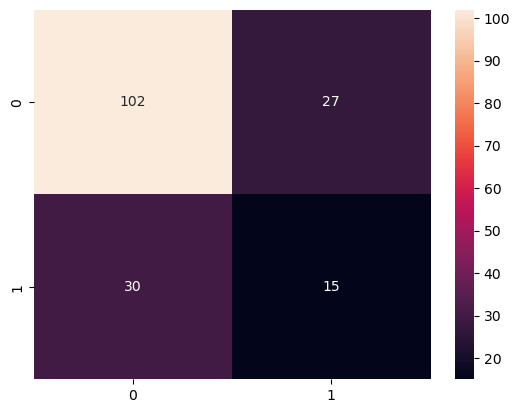

C:\Users\ASUS\AppData\Local\Temp\ipykernel_26488\1420842092.py:15: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "ro" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(range(1,20,2),score_list,'ro',color='blue', marker='o', markerfacecolor='red', markersize=10)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_26488\1420842092.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(range(1,20,2),score_list,'ro',color='blue', marker='o', markerfacecolor='red', markersize=10)


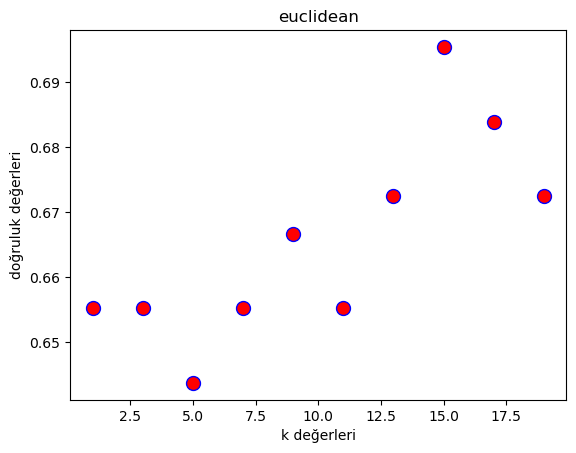

k=1 Uzaklık Yöntemi=manhattan Doğruluk Değeri: 0.632183908045977 
              precision    recall  f1-score   support

           1       0.77      0.71      0.74       129
           2       0.33      0.40      0.36        45

    accuracy                           0.63       174
   macro avg       0.55      0.56      0.55       174
weighted avg       0.66      0.63      0.64       174



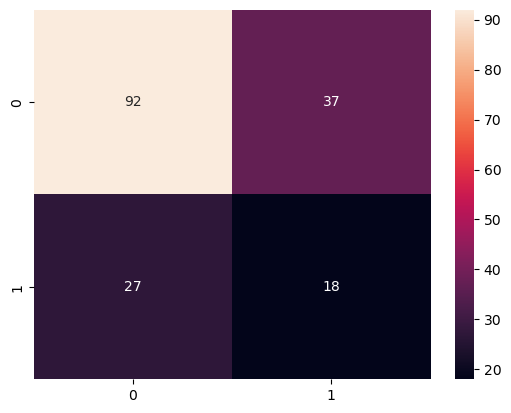

k=3 Uzaklık Yöntemi=manhattan Doğruluk Değeri: 0.6551724137931034 
              precision    recall  f1-score   support

           1       0.78      0.74      0.76       129
           2       0.35      0.40      0.38        45

    accuracy                           0.66       174
   macro avg       0.57      0.57      0.57       174
weighted avg       0.67      0.66      0.66       174



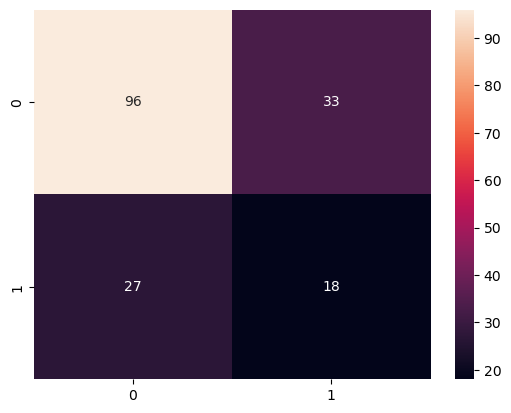

k=5 Uzaklık Yöntemi=manhattan Doğruluk Değeri: 0.6551724137931034 
              precision    recall  f1-score   support

           1       0.78      0.75      0.76       129
           2       0.35      0.38      0.36        45

    accuracy                           0.66       174
   macro avg       0.56      0.56      0.56       174
weighted avg       0.67      0.66      0.66       174



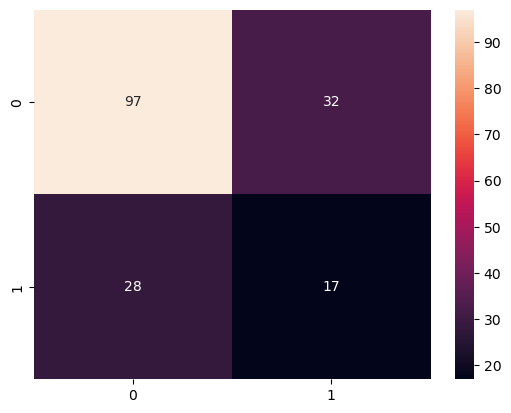

k=7 Uzaklık Yöntemi=manhattan Doğruluk Değeri: 0.6264367816091954 
              precision    recall  f1-score   support

           1       0.76      0.72      0.74       129
           2       0.31      0.36      0.33        45

    accuracy                           0.63       174
   macro avg       0.53      0.54      0.54       174
weighted avg       0.64      0.63      0.63       174



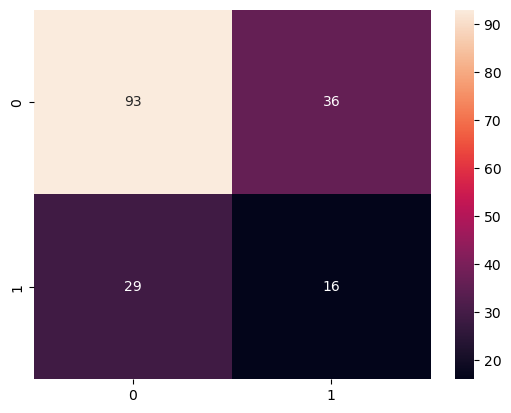

k=9 Uzaklık Yöntemi=manhattan Doğruluk Değeri: 0.6666666666666666 
              precision    recall  f1-score   support

           1       0.78      0.78      0.78       129
           2       0.36      0.36      0.36        45

    accuracy                           0.67       174
   macro avg       0.57      0.57      0.57       174
weighted avg       0.67      0.67      0.67       174



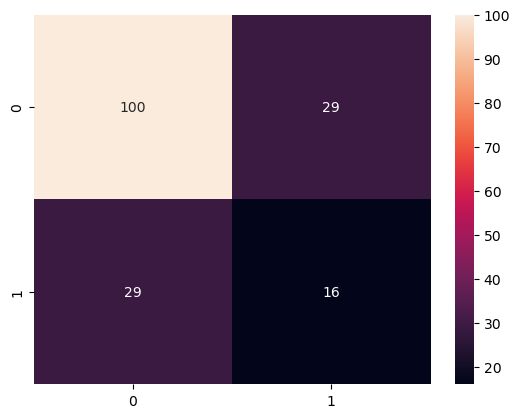

k=11 Uzaklık Yöntemi=manhattan Doğruluk Değeri: 0.6436781609195402 
              precision    recall  f1-score   support

           1       0.76      0.76      0.76       129
           2       0.31      0.31      0.31        45

    accuracy                           0.64       174
   macro avg       0.54      0.54      0.54       174
weighted avg       0.64      0.64      0.64       174



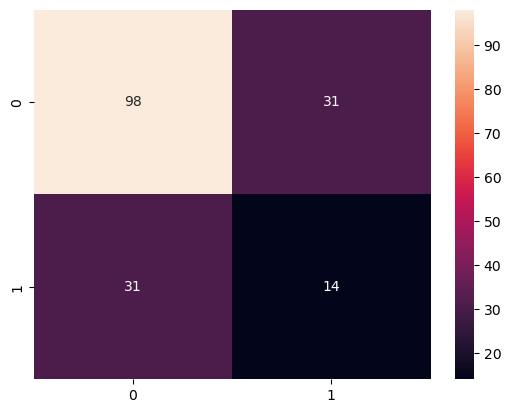

k=13 Uzaklık Yöntemi=manhattan Doğruluk Değeri: 0.6436781609195402 
              precision    recall  f1-score   support

           1       0.75      0.78      0.76       129
           2       0.29      0.27      0.28        45

    accuracy                           0.64       174
   macro avg       0.52      0.52      0.52       174
weighted avg       0.63      0.64      0.64       174



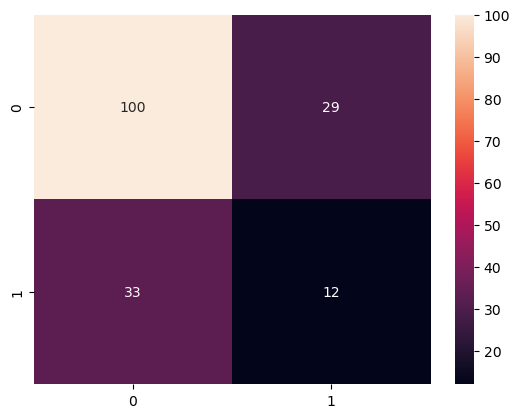

k=15 Uzaklık Yöntemi=manhattan Doğruluk Değeri: 0.6379310344827587 
              precision    recall  f1-score   support

           1       0.75      0.78      0.76       129
           2       0.28      0.24      0.26        45

    accuracy                           0.64       174
   macro avg       0.51      0.51      0.51       174
weighted avg       0.62      0.64      0.63       174



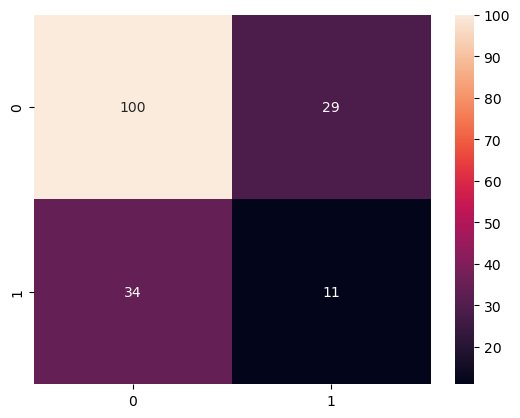

k=17 Uzaklık Yöntemi=manhattan Doğruluk Değeri: 0.6551724137931034 
              precision    recall  f1-score   support

           1       0.75      0.80      0.77       129
           2       0.30      0.24      0.27        45

    accuracy                           0.66       174
   macro avg       0.52      0.52      0.52       174
weighted avg       0.63      0.66      0.64       174



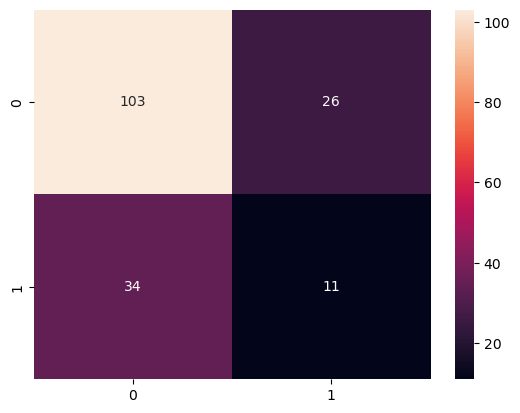

k=19 Uzaklık Yöntemi=manhattan Doğruluk Değeri: 0.6666666666666666 
              precision    recall  f1-score   support

           1       0.76      0.81      0.78       129
           2       0.31      0.24      0.28        45

    accuracy                           0.67       174
   macro avg       0.53      0.53      0.53       174
weighted avg       0.64      0.67      0.65       174



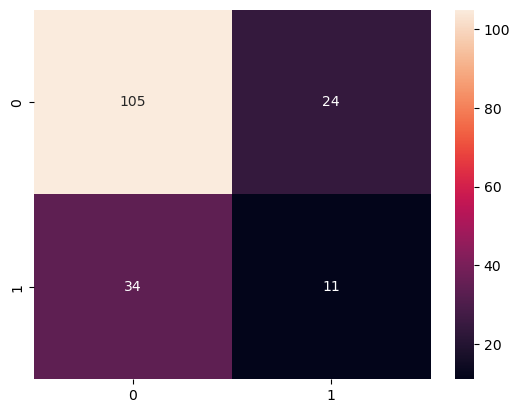

C:\Users\ASUS\AppData\Local\Temp\ipykernel_26488\1420842092.py:15: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "ro" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(range(1,20,2),score_list,'ro',color='blue', marker='o', markerfacecolor='red', markersize=10)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_26488\1420842092.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(range(1,20,2),score_list,'ro',color='blue', marker='o', markerfacecolor='red', markersize=10)


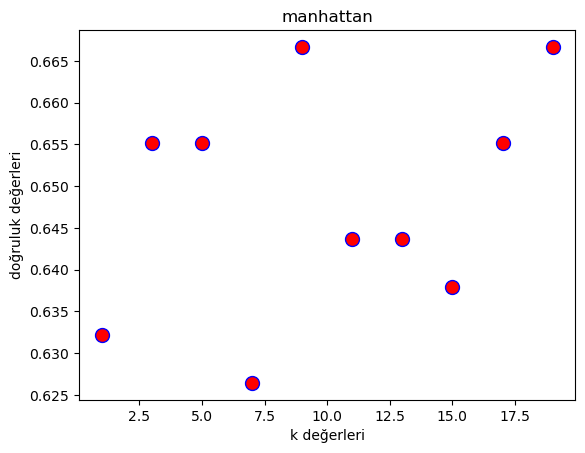

k=1 Uzaklık Yöntemi=chebyshev Doğruluk Değeri: 0.6436781609195402 
              precision    recall  f1-score   support

           1       0.79      0.71      0.75       129
           2       0.35      0.44      0.39        45

    accuracy                           0.64       174
   macro avg       0.57      0.58      0.57       174
weighted avg       0.67      0.64      0.66       174



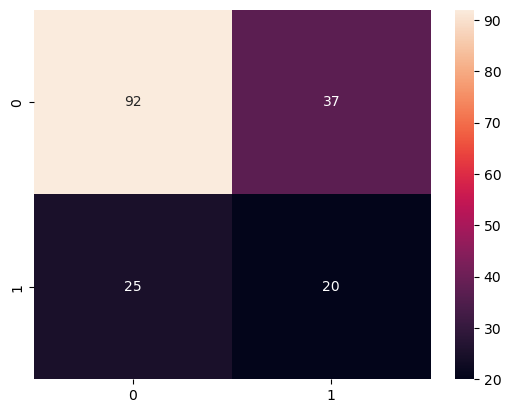

k=3 Uzaklık Yöntemi=chebyshev Doğruluk Değeri: 0.6494252873563219 
              precision    recall  f1-score   support

           1       0.78      0.74      0.76       129
           2       0.35      0.40      0.37        45

    accuracy                           0.65       174
   macro avg       0.56      0.57      0.56       174
weighted avg       0.67      0.65      0.66       174



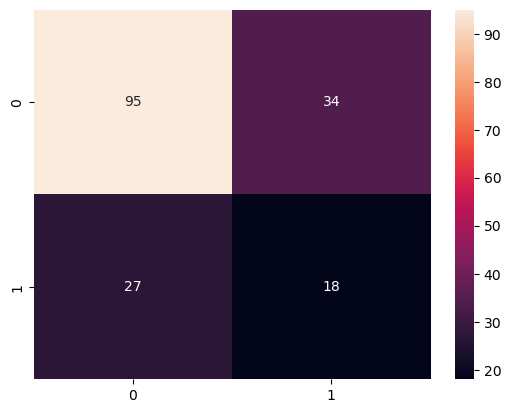

k=5 Uzaklık Yöntemi=chebyshev Doğruluk Değeri: 0.6551724137931034 
              precision    recall  f1-score   support

           1       0.76      0.78      0.77       129
           2       0.32      0.29      0.30        45

    accuracy                           0.66       174
   macro avg       0.54      0.54      0.54       174
weighted avg       0.65      0.66      0.65       174



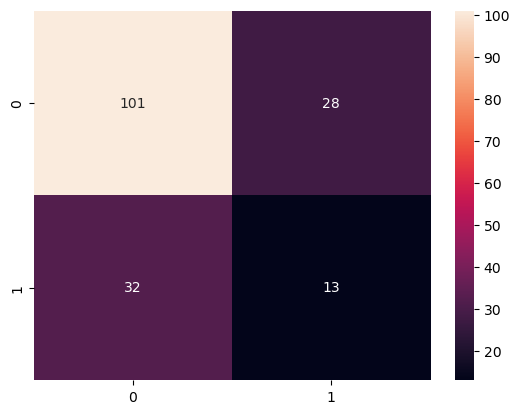

k=7 Uzaklık Yöntemi=chebyshev Doğruluk Değeri: 0.6839080459770115 
              precision    recall  f1-score   support

           1       0.79      0.78      0.79       129
           2       0.39      0.40      0.40        45

    accuracy                           0.68       174
   macro avg       0.59      0.59      0.59       174
weighted avg       0.69      0.68      0.69       174



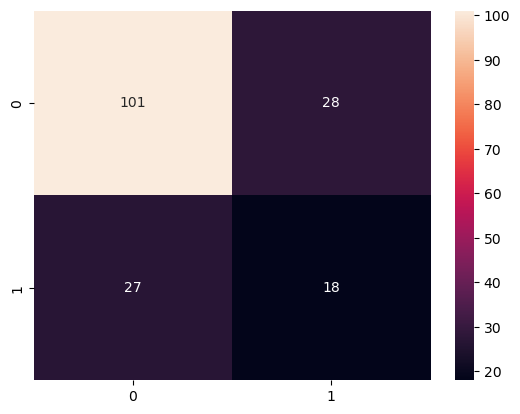

k=9 Uzaklık Yöntemi=chebyshev Doğruluk Değeri: 0.6781609195402298 
              precision    recall  f1-score   support

           1       0.78      0.78      0.78       129
           2       0.38      0.38      0.38        45

    accuracy                           0.68       174
   macro avg       0.58      0.58      0.58       174
weighted avg       0.68      0.68      0.68       174



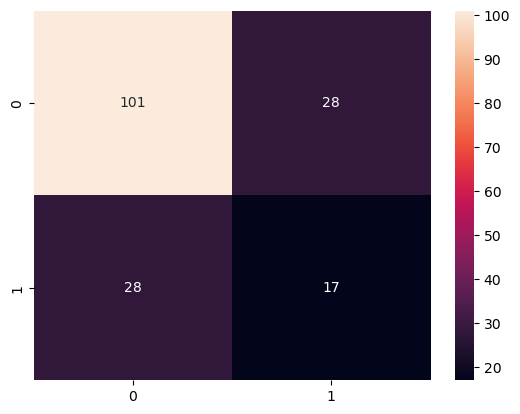

k=11 Uzaklık Yöntemi=chebyshev Doğruluk Değeri: 0.6896551724137931 
              precision    recall  f1-score   support

           1       0.79      0.80      0.79       129
           2       0.40      0.38      0.39        45

    accuracy                           0.69       174
   macro avg       0.59      0.59      0.59       174
weighted avg       0.69      0.69      0.69       174



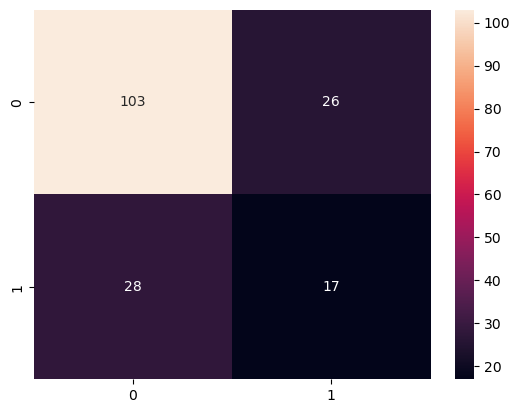

k=13 Uzaklık Yöntemi=chebyshev Doğruluk Değeri: 0.6839080459770115 
              precision    recall  f1-score   support

           1       0.78      0.80      0.79       129
           2       0.38      0.36      0.37        45

    accuracy                           0.68       174
   macro avg       0.58      0.58      0.58       174
weighted avg       0.68      0.68      0.68       174



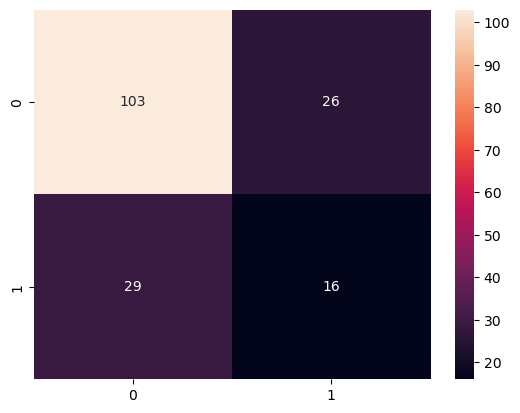

k=15 Uzaklık Yöntemi=chebyshev Doğruluk Değeri: 0.6954022988505747 
              precision    recall  f1-score   support

           1       0.78      0.83      0.80       129
           2       0.39      0.31      0.35        45

    accuracy                           0.70       174
   macro avg       0.58      0.57      0.57       174
weighted avg       0.68      0.70      0.68       174



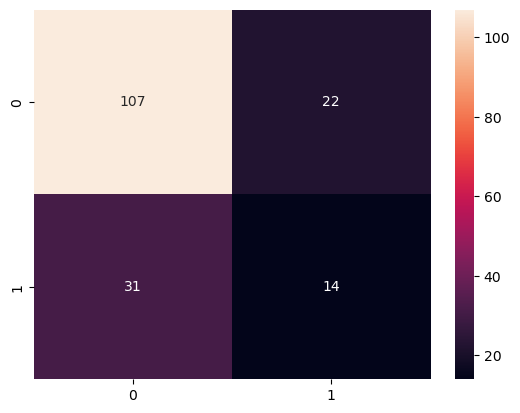

k=17 Uzaklık Yöntemi=chebyshev Doğruluk Değeri: 0.7126436781609196 
              precision    recall  f1-score   support

           1       0.78      0.85      0.81       129
           2       0.42      0.31      0.36        45

    accuracy                           0.71       174
   macro avg       0.60      0.58      0.59       174
weighted avg       0.69      0.71      0.70       174



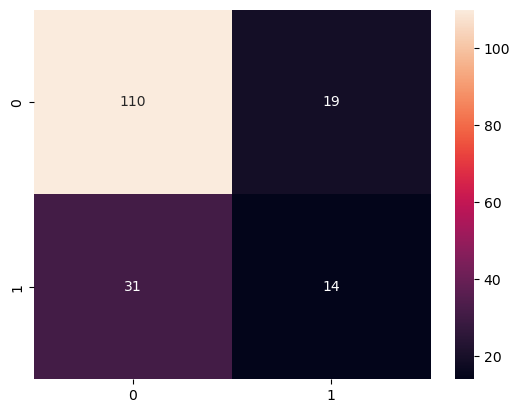

k=19 Uzaklık Yöntemi=chebyshev Doğruluk Değeri: 0.7011494252873564 
              precision    recall  f1-score   support

           1       0.78      0.84      0.81       129
           2       0.40      0.31      0.35        45

    accuracy                           0.70       174
   macro avg       0.59      0.57      0.58       174
weighted avg       0.68      0.70      0.69       174



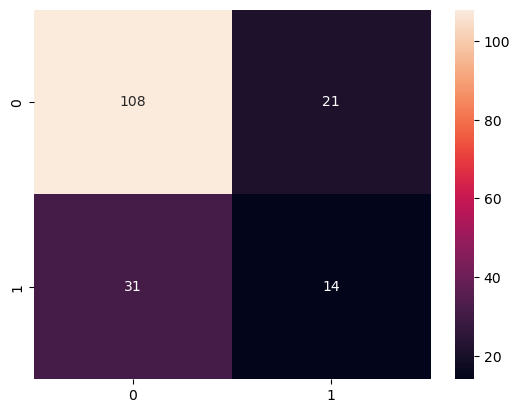

C:\Users\ASUS\AppData\Local\Temp\ipykernel_26488\1420842092.py:15: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "ro" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(range(1,20,2),score_list,'ro',color='blue', marker='o', markerfacecolor='red', markersize=10)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_26488\1420842092.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(range(1,20,2),score_list,'ro',color='blue', marker='o', markerfacecolor='red', markersize=10)


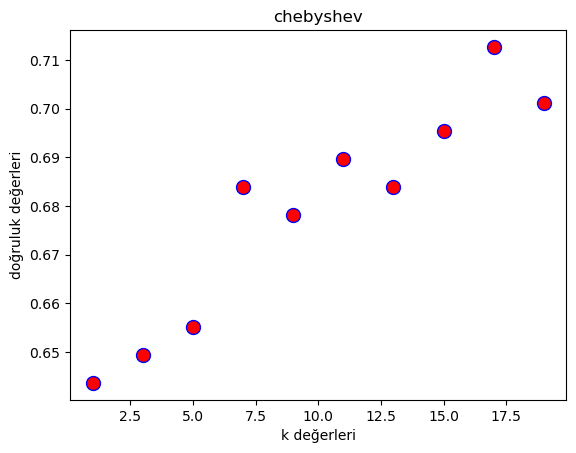

k=1 Uzaklık Yöntemi=minkowski Doğruluk Değeri: 0.6551724137931034 
              precision    recall  f1-score   support

           1       0.79      0.72      0.76       129
           2       0.37      0.47      0.41        45

    accuracy                           0.66       174
   macro avg       0.58      0.59      0.58       174
weighted avg       0.68      0.66      0.67       174



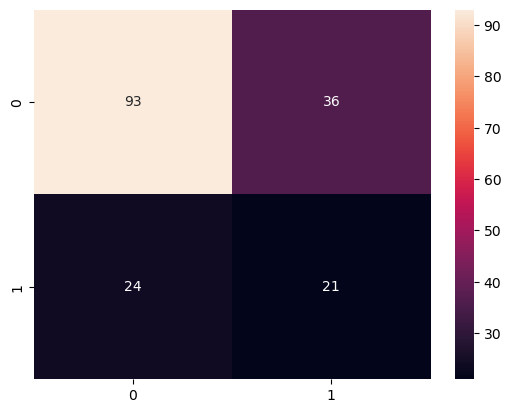

k=3 Uzaklık Yöntemi=minkowski Doğruluk Değeri: 0.6551724137931034 
              precision    recall  f1-score   support

           1       0.77      0.77      0.77       129
           2       0.33      0.33      0.33        45

    accuracy                           0.66       174
   macro avg       0.55      0.55      0.55       174
weighted avg       0.66      0.66      0.66       174



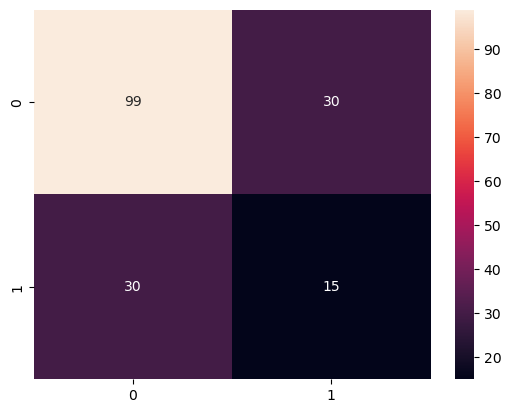

k=5 Uzaklık Yöntemi=minkowski Doğruluk Değeri: 0.6436781609195402 
              precision    recall  f1-score   support

           1       0.76      0.75      0.76       129
           2       0.32      0.33      0.33        45

    accuracy                           0.64       174
   macro avg       0.54      0.54      0.54       174
weighted avg       0.65      0.64      0.65       174



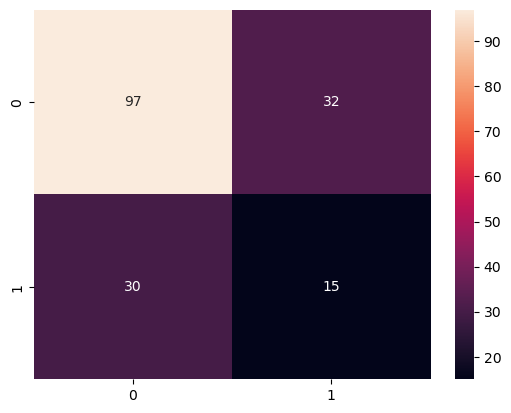

k=7 Uzaklık Yöntemi=minkowski Doğruluk Değeri: 0.6551724137931034 
              precision    recall  f1-score   support

           1       0.78      0.75      0.76       129
           2       0.35      0.38      0.36        45

    accuracy                           0.66       174
   macro avg       0.56      0.56      0.56       174
weighted avg       0.67      0.66      0.66       174



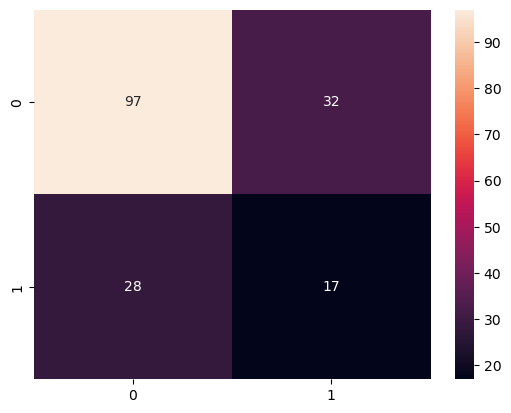

k=9 Uzaklık Yöntemi=minkowski Doğruluk Değeri: 0.6666666666666666 
              precision    recall  f1-score   support

           1       0.78      0.77      0.77       129
           2       0.36      0.38      0.37        45

    accuracy                           0.67       174
   macro avg       0.57      0.57      0.57       174
weighted avg       0.67      0.67      0.67       174



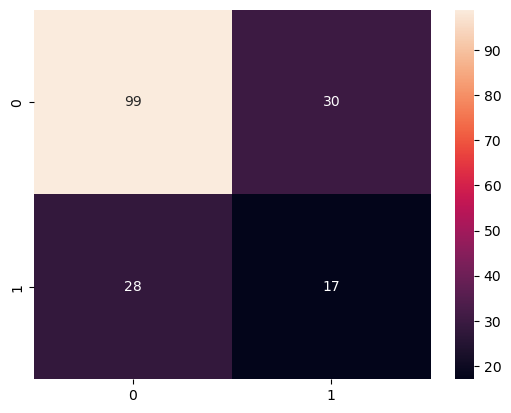

k=11 Uzaklık Yöntemi=minkowski Doğruluk Değeri: 0.6551724137931034 
              precision    recall  f1-score   support

           1       0.75      0.80      0.77       129
           2       0.30      0.24      0.27        45

    accuracy                           0.66       174
   macro avg       0.52      0.52      0.52       174
weighted avg       0.63      0.66      0.64       174



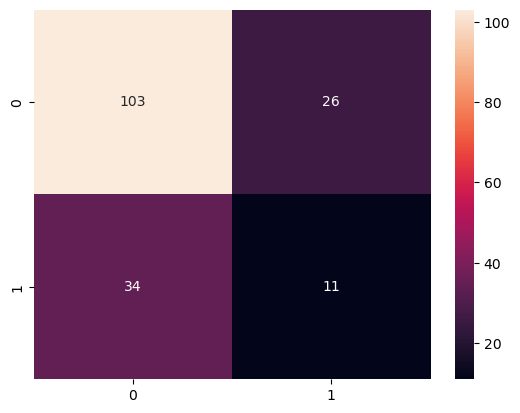

k=13 Uzaklık Yöntemi=minkowski Doğruluk Değeri: 0.6724137931034483 
              precision    recall  f1-score   support

           1       0.76      0.81      0.78       129
           2       0.34      0.29      0.31        45

    accuracy                           0.67       174
   macro avg       0.55      0.55      0.55       174
weighted avg       0.66      0.67      0.66       174



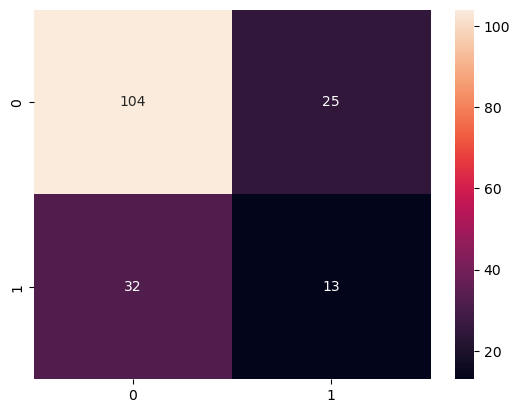

k=15 Uzaklık Yöntemi=minkowski Doğruluk Değeri: 0.6954022988505747 
              precision    recall  f1-score   support

           1       0.78      0.83      0.80       129
           2       0.39      0.31      0.35        45

    accuracy                           0.70       174
   macro avg       0.58      0.57      0.57       174
weighted avg       0.68      0.70      0.68       174



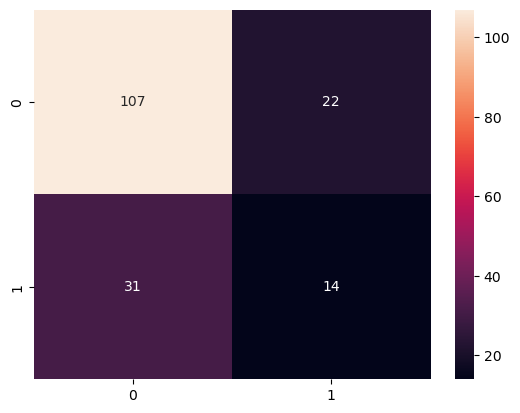

k=17 Uzaklık Yöntemi=minkowski Doğruluk Değeri: 0.6839080459770115 
              precision    recall  f1-score   support

           1       0.77      0.82      0.79       129
           2       0.36      0.29      0.32        45

    accuracy                           0.68       174
   macro avg       0.56      0.56      0.56       174
weighted avg       0.66      0.68      0.67       174



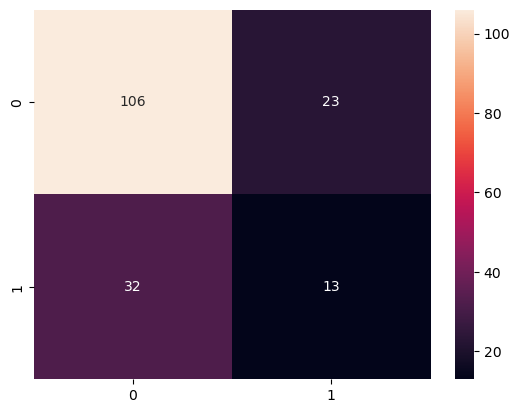

k=19 Uzaklık Yöntemi=minkowski Doğruluk Değeri: 0.6724137931034483 
              precision    recall  f1-score   support

           1       0.77      0.79      0.78       129
           2       0.36      0.33      0.34        45

    accuracy                           0.67       174
   macro avg       0.56      0.56      0.56       174
weighted avg       0.67      0.67      0.67       174



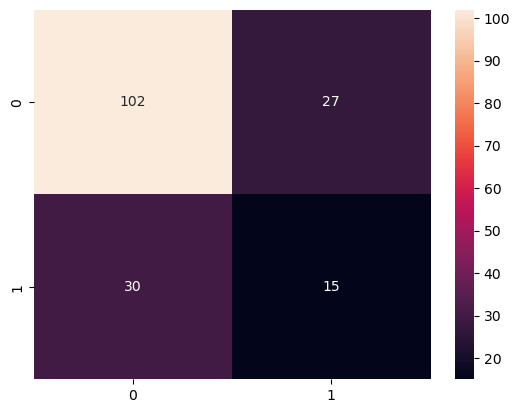

C:\Users\ASUS\AppData\Local\Temp\ipykernel_26488\1420842092.py:15: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "ro" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(range(1,20,2),score_list,'ro',color='blue', marker='o', markerfacecolor='red', markersize=10)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_26488\1420842092.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(range(1,20,2),score_list,'ro',color='blue', marker='o', markerfacecolor='red', markersize=10)


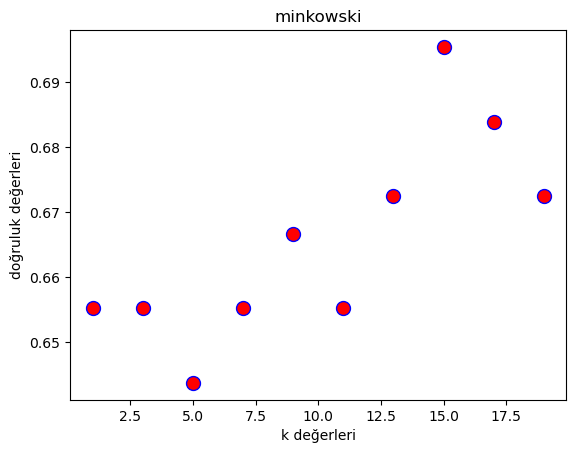

In [34]:
from sklearn.neighbors import KNeighborsClassifier
score_list = []
metric_list=['euclidean','manhattan','chebyshev','minkowski']
for mtrc in metric_list:
    for each in range(1,20,2):
        knn2 = KNeighborsClassifier(n_neighbors = each,metric=mtrc)
        knn2.fit(x_train,y_train)
        prediction = knn2.predict(x_test)
        score_list.append(knn2.score(x_test,y_test))
        cm = confusion_matrix(y_test,prediction)
        print("k={} Uzaklık Yöntemi={} Doğruluk Değeri: {} ".format(each,mtrc,knn2.score(x_test,y_test)))
        print(classification_report(y_test, prediction))
        sns.heatmap(cm,annot=True,fmt="d") 
        plt.show()
    plt.plot(range(1,20,2),score_list,'ro',color='blue', marker='o', markerfacecolor='red', markersize=10)
    plt.title(mtrc)
    plt.xlabel("k değerleri")
    plt.ylabel("doğruluk değerleri")
    plt.show()
    score_list.clear()


score:  0.5517241379310345
              precision    recall  f1-score   support

           1       0.96      0.41      0.58       129
           2       0.36      0.96      0.52        45

    accuracy                           0.55       174
   macro avg       0.66      0.68      0.55       174
weighted avg       0.81      0.55      0.56       174



<Axes: >

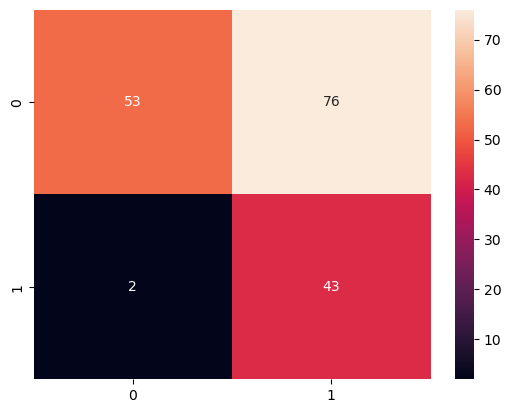

In [35]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
print("score: ",nb.score(x_test,y_test))
prediction = nb.predict(x_test)
cm = confusion_matrix(y_test,prediction)
print(classification_report(y_test, prediction))
sns.heatmap(cm,annot=True,fmt="d") 

{'C': 1, 'gamma': 0.01}
score:  0.735632183908046
              precision    recall  f1-score   support

           1       0.81      0.84      0.83       129
           2       0.49      0.42      0.45        45

    accuracy                           0.74       174
   macro avg       0.65      0.63      0.64       174
weighted avg       0.72      0.74      0.73       174



<Axes: >

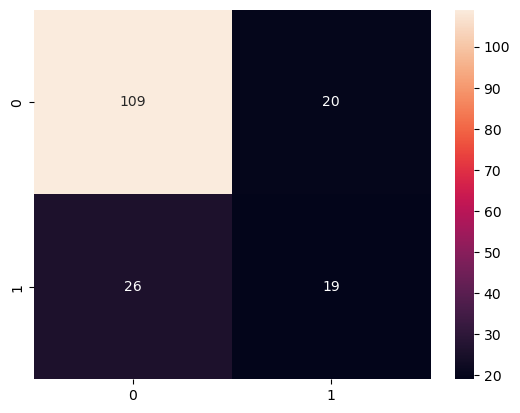

In [36]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale','auto', 0.01, 0.1]
}
grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, cv=5)
grid.fit(x_train, y_train)
print(grid.best_params_)
svm=SVC(class_weight='balanced', C=grid.best_params_['C'], gamma=grid.best_params_['gamma'])
svm.fit(x_train,y_train)
print("score: ",svm.score(x_test,y_test))
prediction = svm.predict(x_test)
cm = confusion_matrix(y_test,prediction)
print(classification_report(y_test, prediction))
sns.heatmap(cm,annot=True,fmt="d") 

100  score:  0.632183908045977
500  score:  0.5574712643678161
1000  score:  0.7126436781609196
1500  score:  0.7471264367816092
2000  score:  0.6954022988505747
5000  score:  0.7413793103448276
10000  score:  0.6494252873563219
              precision    recall  f1-score   support

           1       0.79      0.91      0.84       129
           2       0.52      0.29      0.37        45

    accuracy                           0.75       174
   macro avg       0.65      0.60      0.61       174
weighted avg       0.72      0.75      0.72       174



<Axes: >

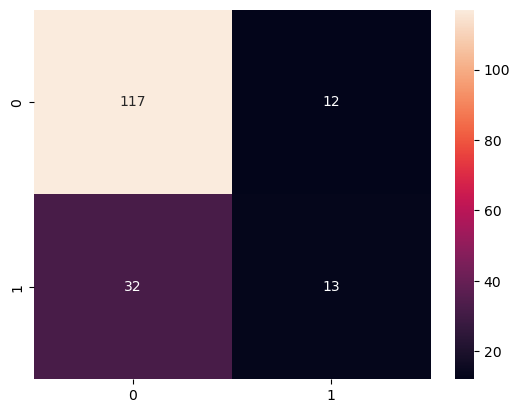

In [37]:
from sklearn.neural_network import MLPClassifier
list=[100, 500, 1000, 1500,2000,5000,10000]
mlpbest=0;
for i in list:
    mlp=MLPClassifier(max_iter=i)
    mlp.fit(x_train,y_train)
    print(i ," score: ",mlp.score(x_test,y_test))
    if mlp.score(x_test,y_test)>mlpbest:
        fitmlp=mlp
        mlpbest=mlp.score(x_test,y_test)
prediction = fitmlp.predict(x_test)
cm = confusion_matrix(y_test,prediction)
print(classification_report(y_test, prediction))
sns.heatmap(cm,annot=True,fmt="d") 

In [38]:
from sklearn.linear_model import LinearRegression

# 3) Regresyonu eğit ve residual’ları hesapla
model = LinearRegression().fit(X_clean, y_clean)
y_pred = model.predict(X_clean)
residuals = np.abs(y_clean - y_pred)

# 4) %95 dilimi eşiğini al
threshold = np.percentile(residuals, 95)

# 5) Aykırı maskesi, say ve temiz veri seti
outlier_mask = residuals > threshold
print(f"Aykırı gözlem sayısı: {outlier_mask.sum()}")

data_clean = data.loc[mask & ~outlier_mask].reset_index(drop=True)
print(f"Önce: {data.shape}, sonra: {data_clean.shape}")


Aykırı gözlem sayısı: 29
Önce: (583, 11), sonra: (550, 11)


<class 'pandas.core.frame.DataFrame'>
Index: 388 entries, 0 to 549
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    int32  
 2   Total_Bilirubin             388 non-null    float64
 3   Direct_Bilirubin            388 non-null    float64
 4   Alkaline_Phosphotase        388 non-null    int64  
 5   Alamine_Aminotransferase    388 non-null    int64  
 6   Aspartate_Aminotransferase  388 non-null    int64  
 7   Total_Protiens              388 non-null    float64
 8   Albumin                     388 non-null    float64
 9   Albumin_and_Globulin_Ratio  388 non-null    float64
 10  Dataset                     388 non-null    int64  
dtypes: float64(5), int32(1), int64(5)
memory usage: 34.9 KB
<class 'pandas.core.frame.DataFrame'>
Index: 136 entries, 8 to 549
Data columns (total 11 columns)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_26488\2848357910.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  H=data_clean[data.Dataset==1]
C:\Users\ASUS\AppData\Local\Temp\ipykernel_26488\2848357910.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  H["label"]  = "hasta"
C:\Users\ASUS\AppData\Local\Temp\ipykernel_26488\2848357910.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HD["label"] = "hasta değil"


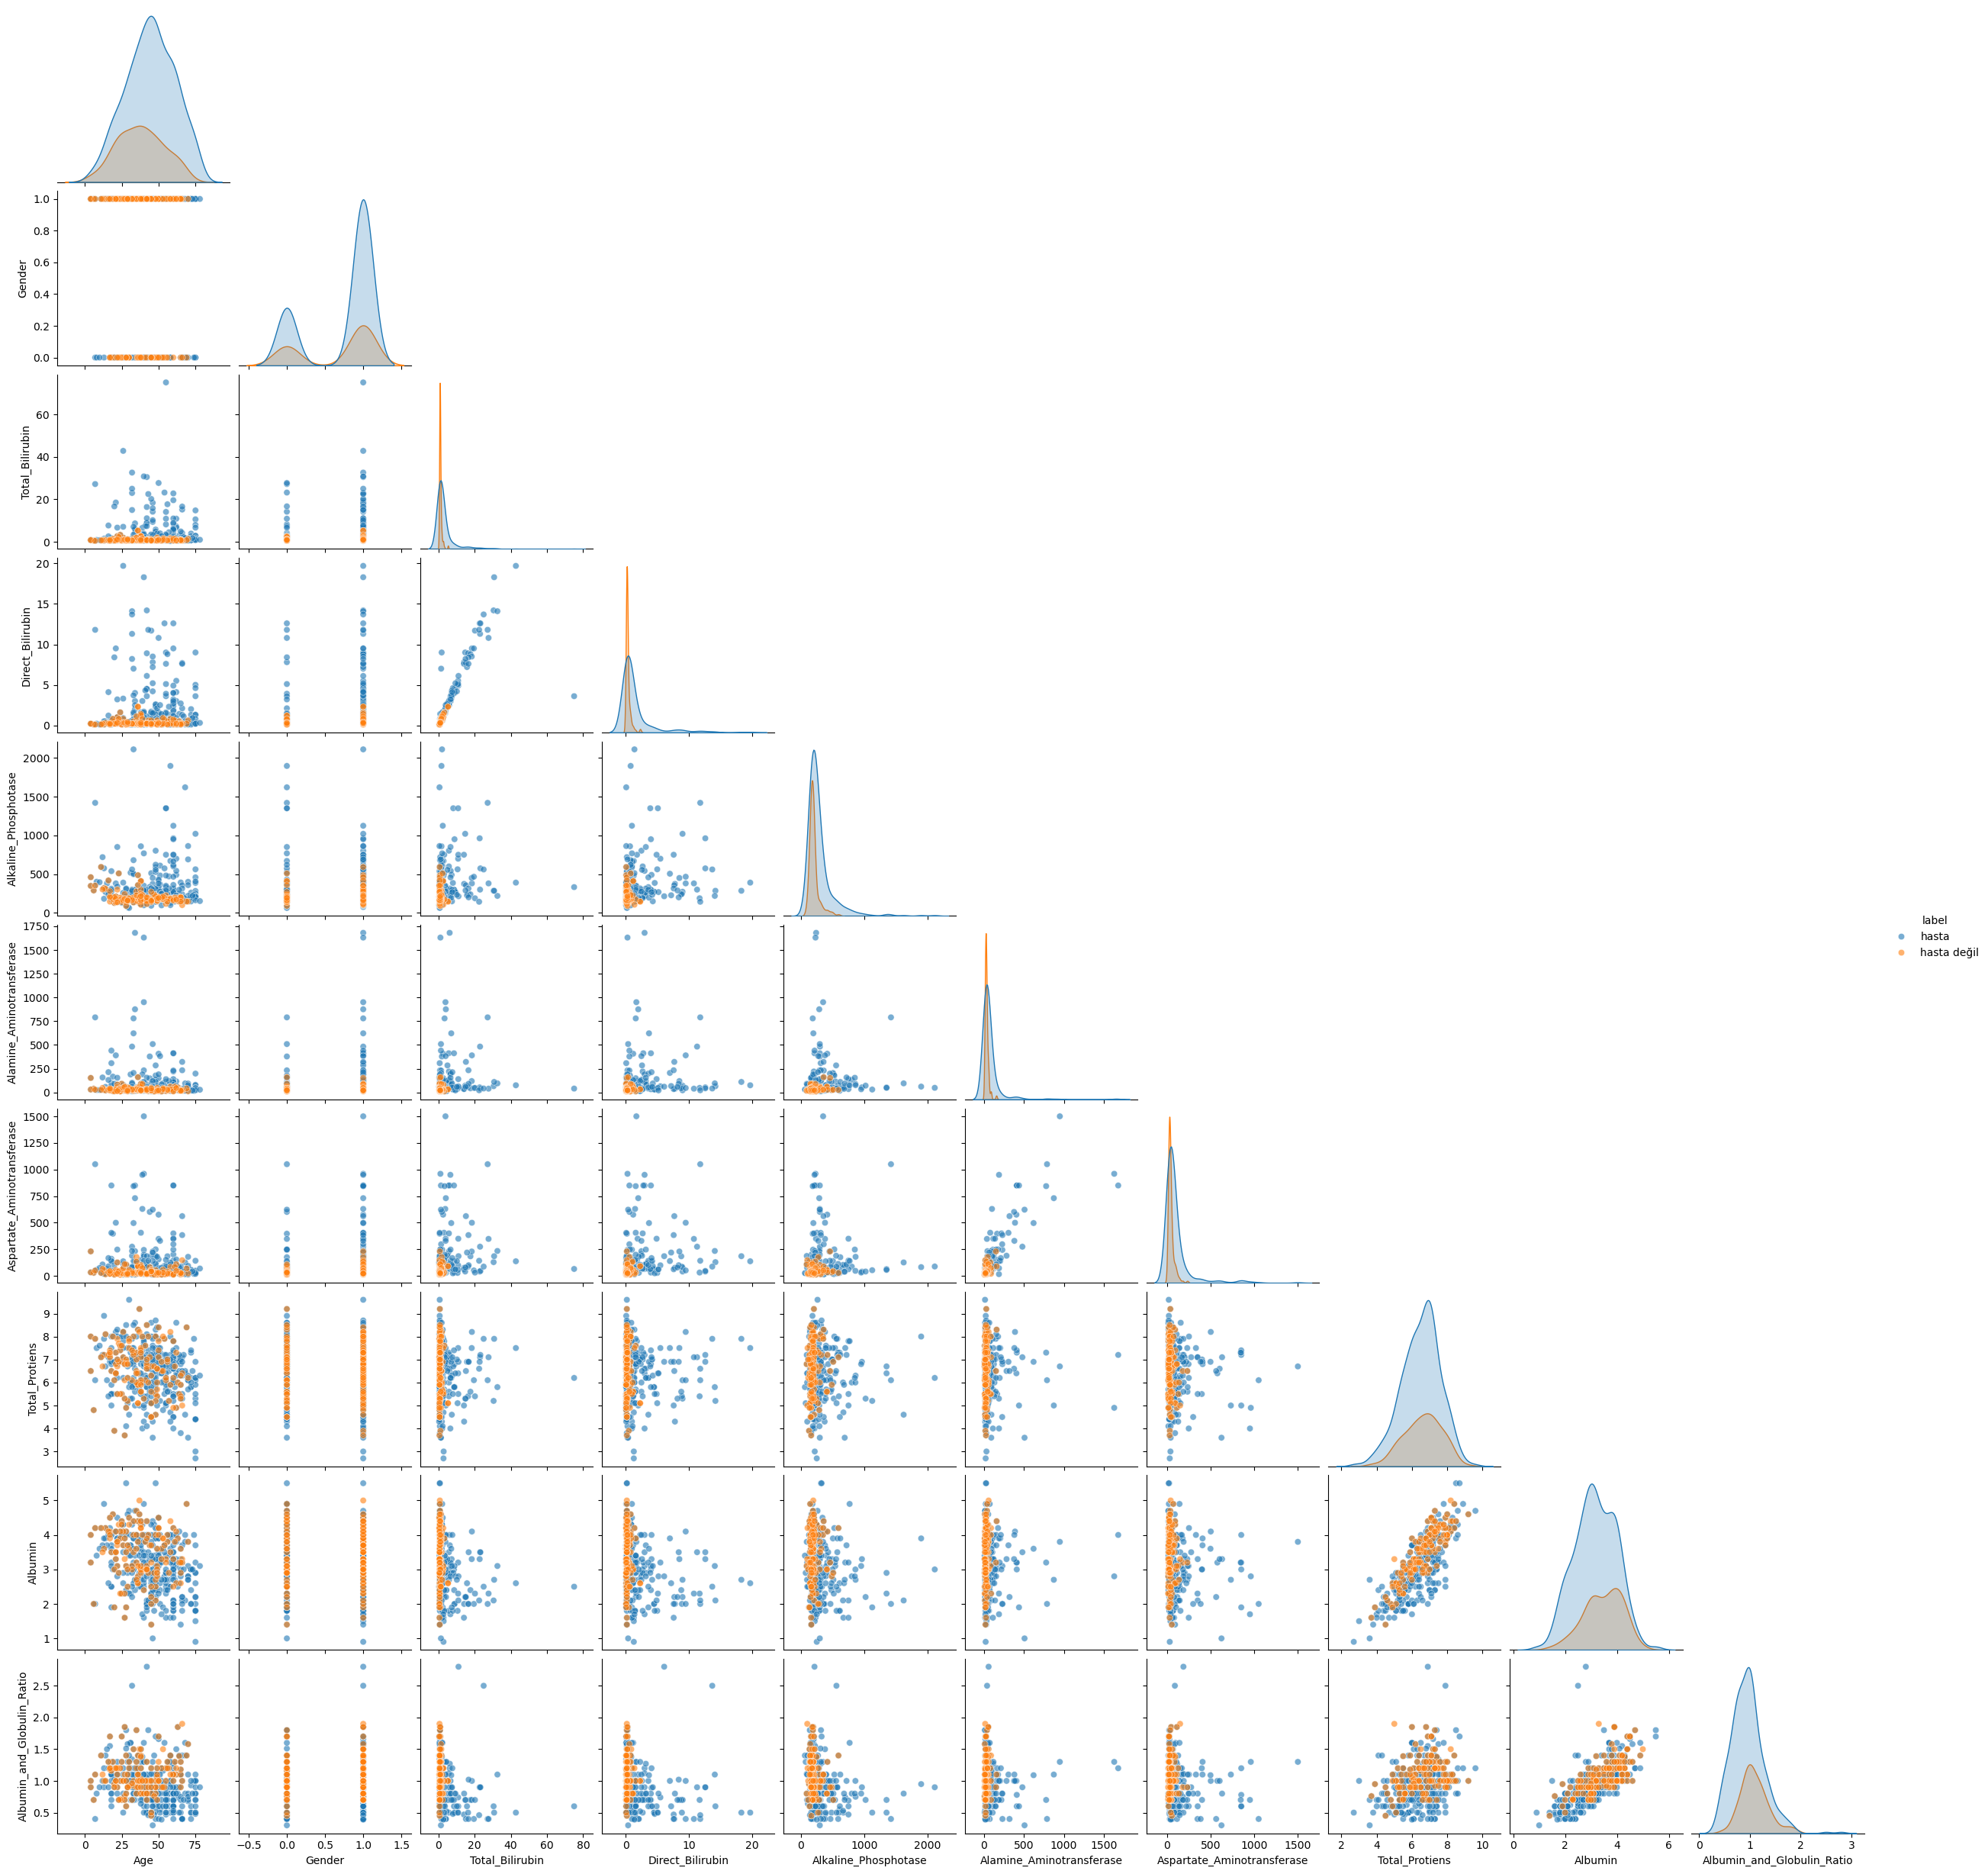

In [39]:
H=data_clean[data.Dataset==1]
HD=data_clean[data_clean.Dataset==2]
H.info()
HD.info()
H["label"]  = "hasta"
HD["label"] = "hasta değil"
df = pd.concat([H, HD], ignore_index=True)

# 2) Çiz
sns.pairplot(
    df,
    vars=["Age","Gender","Total_Bilirubin","Direct_Bilirubin","Alkaline_Phosphotase","Alamine_Aminotransferase","Aspartate_Aminotransferase","Total_Protiens","Albumin","Albumin_and_Globulin_Ratio"],
    hue="label",           # rengi hasta/hasta değil'e göre ayarlar
    diag_kind="kde",       # köşedeki dağılımı KDE ile gösterir
    corner=True,           # üst üçgeni gizler
    plot_kws={"alpha":0.6} # noktaları biraz saydam yaparak üst üste binmeyi azaltır
)
plt.show()


In [40]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
y = data_clean.Dataset.values
x_data = data_clean.drop(["Dataset"],axis=1)
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))
smote = SMOTE(
    sampling_strategy='auto',   # azınlık sınıfı çoğaltsın
    k_neighbors=5,              # her yeni örnek için kaç komşu kullansın
    random_state=42
)
x_res, y_res = smote.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x_res,y_res,test_size = 0.3,random_state=42)
print("SMOTE sonrası eğitim dağılımı:", Counter(y_res))

SMOTE sonrası eğitim dağılımı: Counter({1: 414, 2: 414})


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


score:  0.7710843373493976
              precision    recall  f1-score   support

           1       0.77      0.74      0.76       120
           2       0.77      0.80      0.78       129

    accuracy                           0.77       249
   macro avg       0.77      0.77      0.77       249
weighted avg       0.77      0.77      0.77       249



<Axes: >

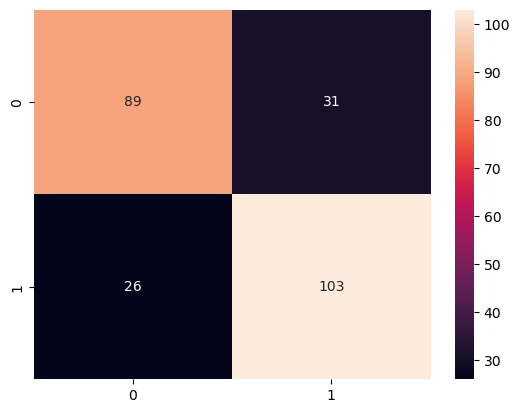

In [41]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
abc= AdaBoostClassifier(n_estimators=100,learning_rate=1.0,random_state=42)
abc.fit(x_train,y_train)
print("score: ",abc.score(x_test,y_test))
prediction = abc.predict(x_test)
cm = confusion_matrix(y_test,prediction)
print(classification_report(y_test, prediction))
sns.heatmap(cm,annot=True,fmt="d") 

score:  0.8313253012048193
              precision    recall  f1-score   support

           1       0.86      0.78      0.82       120
           2       0.81      0.88      0.84       129

    accuracy                           0.83       249
   macro avg       0.83      0.83      0.83       249
weighted avg       0.83      0.83      0.83       249



<Axes: >

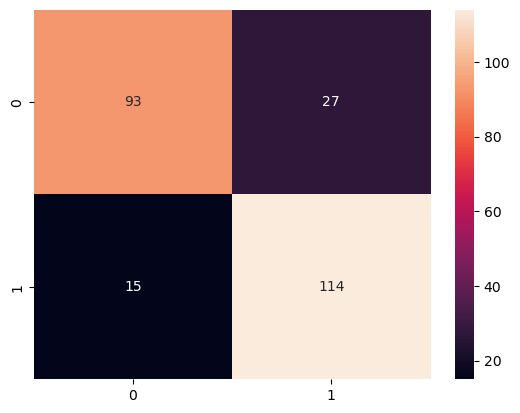

In [42]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
rfc= RandomForestClassifier(n_estimators=100,max_depth=None,random_state=42)
rfc.fit(x_train,y_train)
print("score: ",rfc.score(x_test,y_test))
prediction = rfc.predict(x_test)
cm = confusion_matrix(y_test,prediction)
print(classification_report(y_test, prediction))
sns.heatmap(cm,annot=True,fmt="d") 

score:  -0.10731340388160704
              precision    recall  f1-score   support

           0       0.90      0.80      0.85       120
           1       0.83      0.91      0.87       129

    accuracy                           0.86       249
   macro avg       0.86      0.86      0.86       249
weighted avg       0.86      0.86      0.86       249



C:\Users\ASUS\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:10:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


<Axes: >

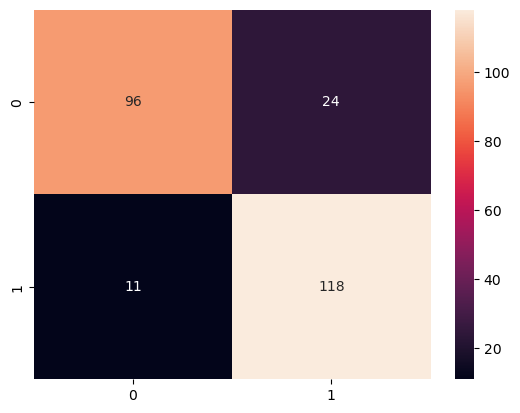

In [43]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)  # 1→0, 2→1
y_test_enc  = le.transform(y_test)
xgb=XGBClassifier(n_estimators=100,learning_rate=0.1,use_label_encoder=False,eval_metric='logloss',random_state=42)
xgb.fit(x_train, y_train_enc)
y_pred = xgb.predict(x_test)
print("score: ",model.score(x_test,y_test))
cm = confusion_matrix(y_test_enc,y_pred)
print(classification_report(y_test_enc, y_pred))
sns.heatmap(cm,annot=True,fmt="d")


score:  0.8112449799196787
              precision    recall  f1-score   support

           1       0.83      0.77      0.80       120
           2       0.80      0.85      0.82       129

    accuracy                           0.81       249
   macro avg       0.81      0.81      0.81       249
weighted avg       0.81      0.81      0.81       249



<Axes: >

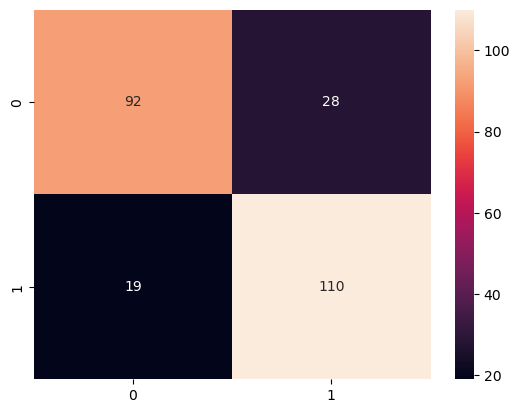

In [44]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion="gini")
dt.fit(x_train,y_train)
from sklearn.metrics import classification_report, confusion_matrix
print("score: ",dt.score(x_test,y_test))
prediction = dt.predict(x_test)
cm = confusion_matrix(y_test,prediction)
print(classification_report(y_test, prediction))
sns.heatmap(cm,annot=True,fmt="d") 

score:  0.8032128514056225
              precision    recall  f1-score   support

           1       0.81      0.77      0.79       120
           2       0.79      0.84      0.82       129

    accuracy                           0.80       249
   macro avg       0.80      0.80      0.80       249
weighted avg       0.80      0.80      0.80       249



<Axes: >

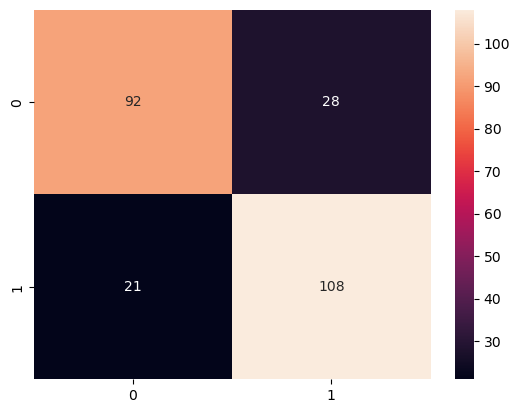

In [45]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion="entropy")
dt.fit(x_train,y_train)
from sklearn.metrics import classification_report, confusion_matrix
print("score: ",dt.score(x_test,y_test))
prediction = dt.predict(x_test)
cm = confusion_matrix(y_test,prediction)
print(classification_report(y_test, prediction))
sns.heatmap(cm,annot=True,fmt="d") 

k=1 Uzaklık Yöntemi=euclidean Doğruluk Değeri: 1.0 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       120
           2       1.00      1.00      1.00       129

    accuracy                           1.00       249
   macro avg       1.00      1.00      1.00       249
weighted avg       1.00      1.00      1.00       249



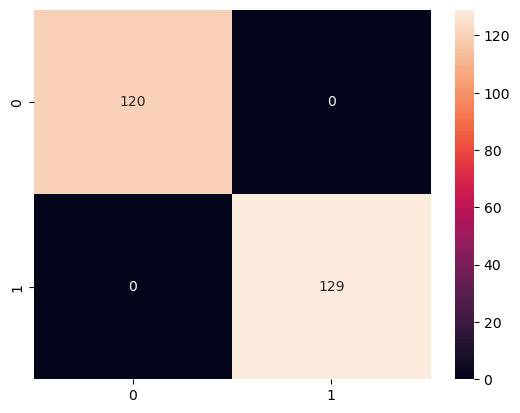

k=3 Uzaklık Yöntemi=euclidean Doğruluk Değeri: 0.8875502008032129 
              precision    recall  f1-score   support

           1       0.97      0.79      0.87       120
           2       0.83      0.98      0.90       129

    accuracy                           0.89       249
   macro avg       0.90      0.88      0.89       249
weighted avg       0.90      0.89      0.89       249



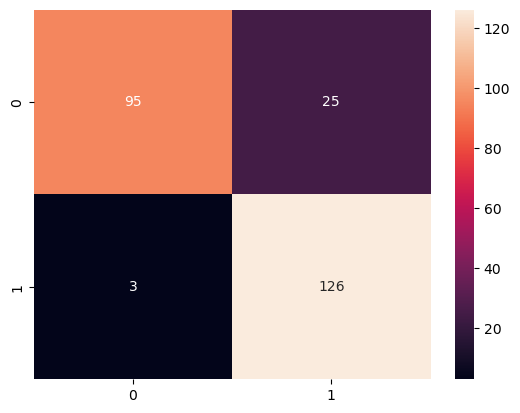

k=5 Uzaklık Yöntemi=euclidean Doğruluk Değeri: 0.8393574297188755 
              precision    recall  f1-score   support

           1       0.95      0.70      0.81       120
           2       0.78      0.97      0.86       129

    accuracy                           0.84       249
   macro avg       0.87      0.83      0.83       249
weighted avg       0.86      0.84      0.84       249



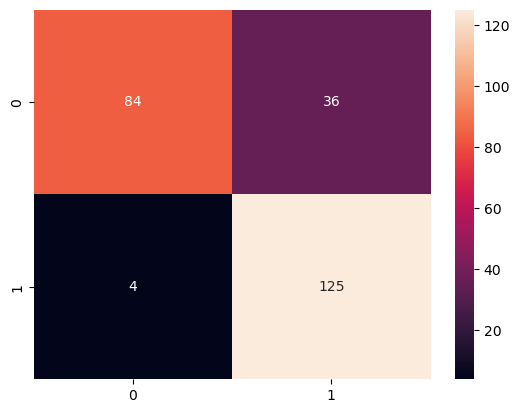

k=7 Uzaklık Yöntemi=euclidean Doğruluk Değeri: 0.8032128514056225 
              precision    recall  f1-score   support

           1       0.92      0.65      0.76       120
           2       0.74      0.95      0.83       129

    accuracy                           0.80       249
   macro avg       0.83      0.80      0.80       249
weighted avg       0.83      0.80      0.80       249



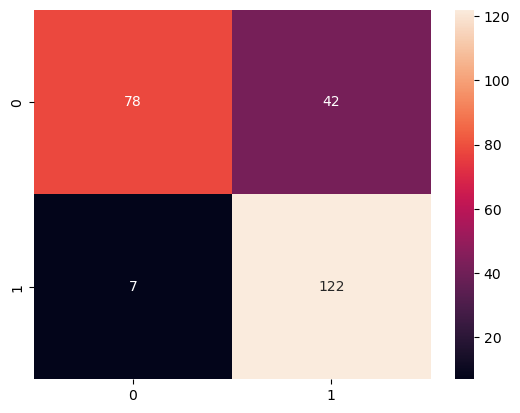

k=9 Uzaklık Yöntemi=euclidean Doğruluk Değeri: 0.8032128514056225 
              precision    recall  f1-score   support

           1       0.93      0.64      0.76       120
           2       0.74      0.95      0.83       129

    accuracy                           0.80       249
   macro avg       0.83      0.80      0.80       249
weighted avg       0.83      0.80      0.80       249



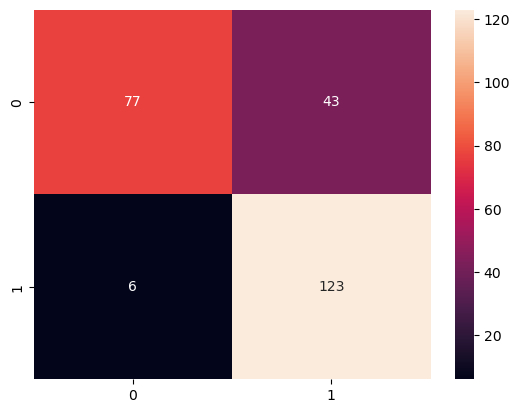

k=11 Uzaklık Yöntemi=euclidean Doğruluk Değeri: 0.8152610441767069 
              precision    recall  f1-score   support

           1       0.95      0.65      0.77       120
           2       0.75      0.97      0.84       129

    accuracy                           0.82       249
   macro avg       0.85      0.81      0.81       249
weighted avg       0.85      0.82      0.81       249



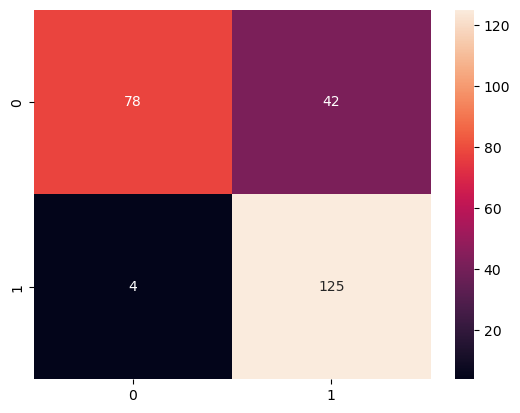

k=13 Uzaklık Yöntemi=euclidean Doğruluk Değeri: 0.8032128514056225 
              precision    recall  f1-score   support

           1       0.93      0.64      0.76       120
           2       0.74      0.95      0.83       129

    accuracy                           0.80       249
   macro avg       0.83      0.80      0.80       249
weighted avg       0.83      0.80      0.80       249



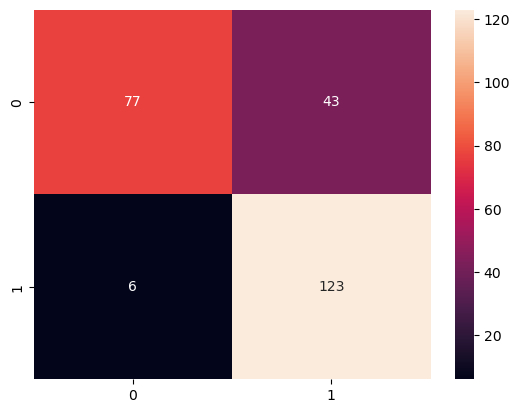

k=15 Uzaklık Yöntemi=euclidean Doğruluk Değeri: 0.8072289156626506 
              precision    recall  f1-score   support

           1       0.94      0.64      0.76       120
           2       0.74      0.96      0.84       129

    accuracy                           0.81       249
   macro avg       0.84      0.80      0.80       249
weighted avg       0.84      0.81      0.80       249



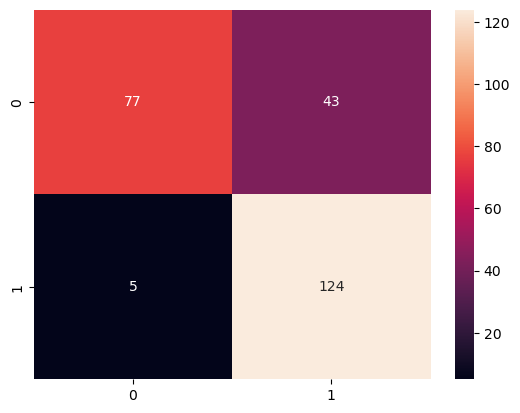

k=17 Uzaklık Yöntemi=euclidean Doğruluk Değeri: 0.7951807228915663 
              precision    recall  f1-score   support

           1       0.94      0.62      0.74       120
           2       0.73      0.96      0.83       129

    accuracy                           0.80       249
   macro avg       0.83      0.79      0.79       249
weighted avg       0.83      0.80      0.79       249



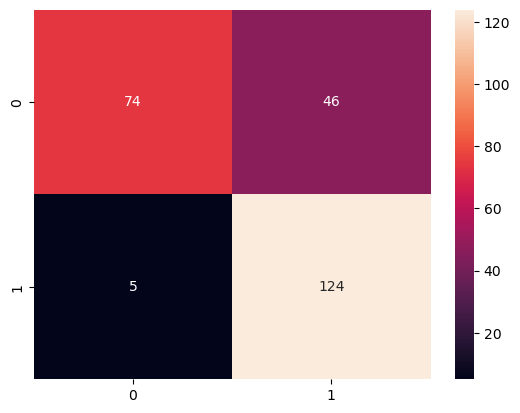

k=19 Uzaklık Yöntemi=euclidean Doğruluk Değeri: 0.7871485943775101 
              precision    recall  f1-score   support

           1       0.92      0.61      0.73       120
           2       0.72      0.95      0.82       129

    accuracy                           0.79       249
   macro avg       0.82      0.78      0.78       249
weighted avg       0.82      0.79      0.78       249



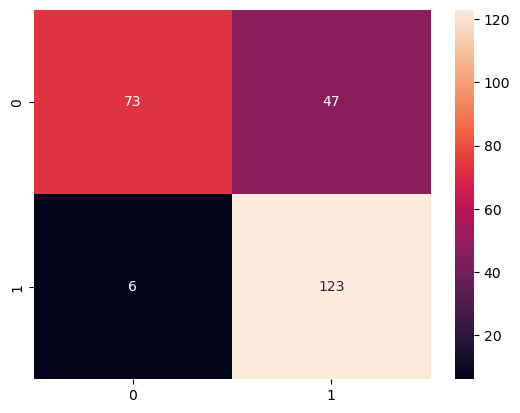

C:\Users\ASUS\AppData\Local\Temp\ipykernel_26488\1079121172.py:15: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "ro" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(range(1,20,2),score_list,'ro',color='blue', marker='o', markerfacecolor='red', markersize=10)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_26488\1079121172.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(range(1,20,2),score_list,'ro',color='blue', marker='o', markerfacecolor='red', markersize=10)


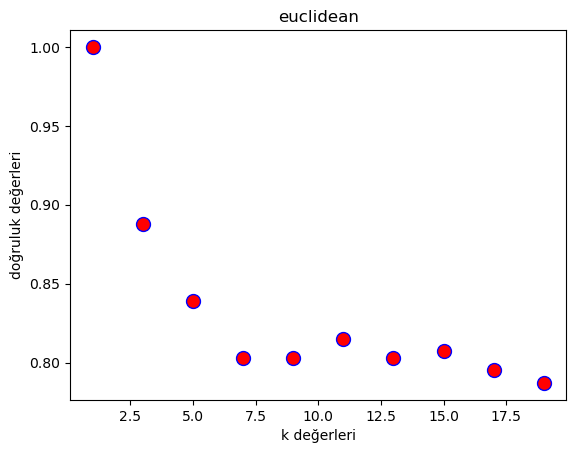

k=1 Uzaklık Yöntemi=manhattan Doğruluk Değeri: 1.0 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       120
           2       1.00      1.00      1.00       129

    accuracy                           1.00       249
   macro avg       1.00      1.00      1.00       249
weighted avg       1.00      1.00      1.00       249



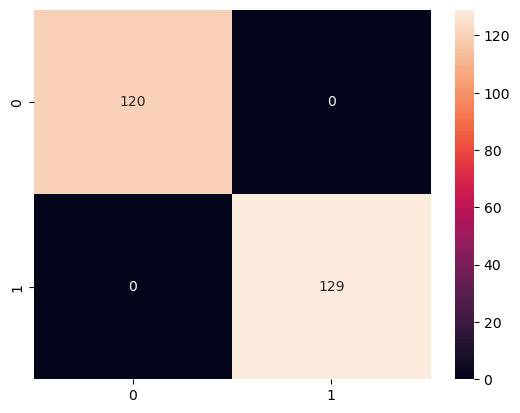

k=3 Uzaklık Yöntemi=manhattan Doğruluk Değeri: 0.891566265060241 
              precision    recall  f1-score   support

           1       0.96      0.81      0.88       120
           2       0.84      0.97      0.90       129

    accuracy                           0.89       249
   macro avg       0.90      0.89      0.89       249
weighted avg       0.90      0.89      0.89       249



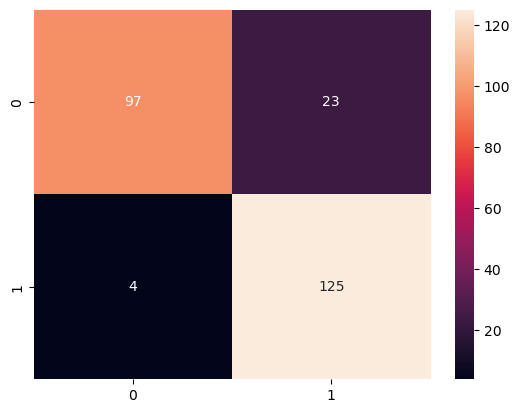

k=5 Uzaklık Yöntemi=manhattan Doğruluk Değeri: 0.8353413654618473 
              precision    recall  f1-score   support

           1       0.93      0.71      0.81       120
           2       0.78      0.95      0.86       129

    accuracy                           0.84       249
   macro avg       0.86      0.83      0.83       249
weighted avg       0.85      0.84      0.83       249



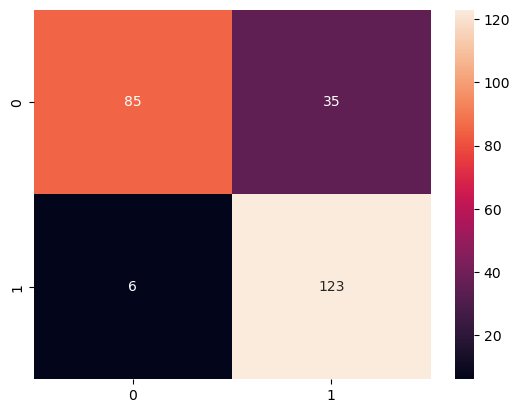

k=7 Uzaklık Yöntemi=manhattan Doğruluk Değeri: 0.8032128514056225 
              precision    recall  f1-score   support

           1       0.92      0.65      0.76       120
           2       0.74      0.95      0.83       129

    accuracy                           0.80       249
   macro avg       0.83      0.80      0.80       249
weighted avg       0.83      0.80      0.80       249



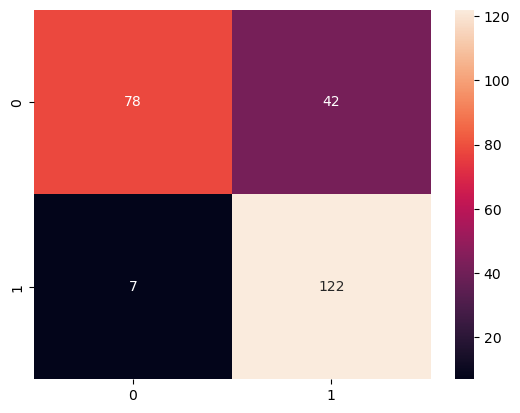

k=9 Uzaklık Yöntemi=manhattan Doğruluk Değeri: 0.8072289156626506 
              precision    recall  f1-score   support

           1       0.95      0.63      0.76       120
           2       0.74      0.97      0.84       129

    accuracy                           0.81       249
   macro avg       0.84      0.80      0.80       249
weighted avg       0.84      0.81      0.80       249



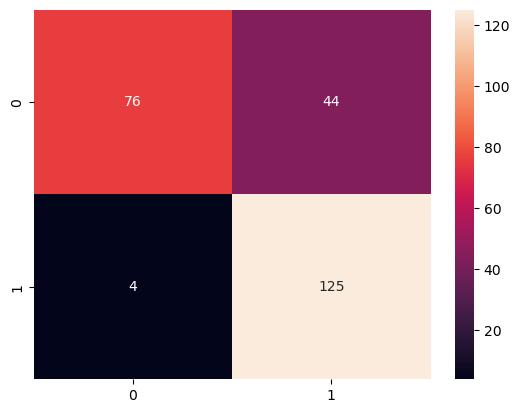

k=11 Uzaklık Yöntemi=manhattan Doğruluk Değeri: 0.8032128514056225 
              precision    recall  f1-score   support

           1       0.95      0.62      0.75       120
           2       0.74      0.97      0.84       129

    accuracy                           0.80       249
   macro avg       0.84      0.80      0.79       249
weighted avg       0.84      0.80      0.80       249



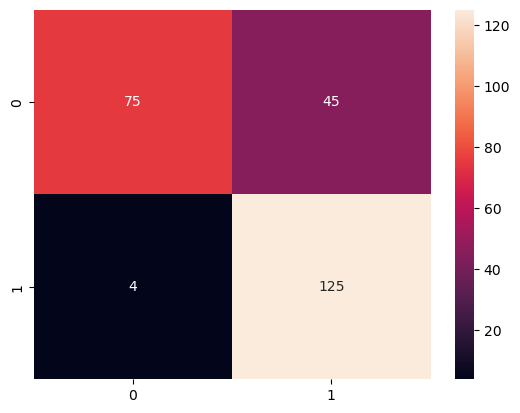

k=13 Uzaklık Yöntemi=manhattan Doğruluk Değeri: 0.7871485943775101 
              precision    recall  f1-score   support

           1       0.91      0.62      0.74       120
           2       0.73      0.95      0.82       129

    accuracy                           0.79       249
   macro avg       0.82      0.78      0.78       249
weighted avg       0.82      0.79      0.78       249



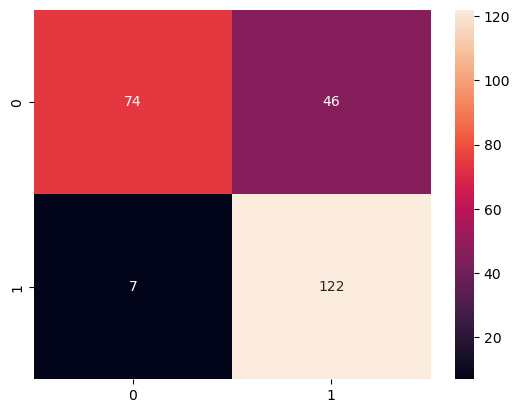

k=15 Uzaklık Yöntemi=manhattan Doğruluk Değeri: 0.7871485943775101 
              precision    recall  f1-score   support

           1       0.91      0.62      0.74       120
           2       0.73      0.95      0.82       129

    accuracy                           0.79       249
   macro avg       0.82      0.78      0.78       249
weighted avg       0.82      0.79      0.78       249



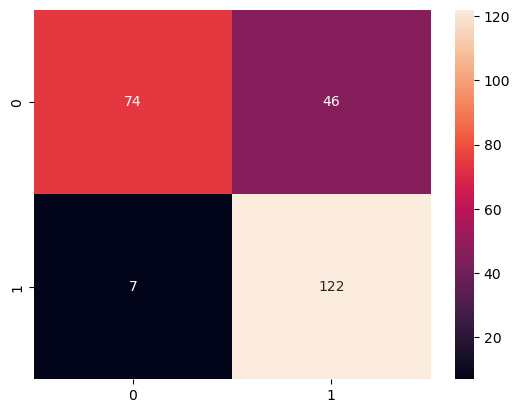

k=17 Uzaklık Yöntemi=manhattan Doğruluk Değeri: 0.7911646586345381 
              precision    recall  f1-score   support

           1       0.91      0.62      0.74       120
           2       0.73      0.95      0.82       129

    accuracy                           0.79       249
   macro avg       0.82      0.79      0.78       249
weighted avg       0.82      0.79      0.78       249



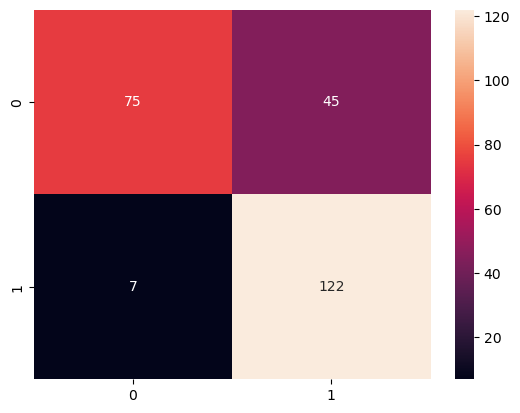

k=19 Uzaklık Yöntemi=manhattan Doğruluk Değeri: 0.7831325301204819 
              precision    recall  f1-score   support

           1       0.92      0.60      0.73       120
           2       0.72      0.95      0.82       129

    accuracy                           0.78       249
   macro avg       0.82      0.78      0.77       249
weighted avg       0.82      0.78      0.78       249



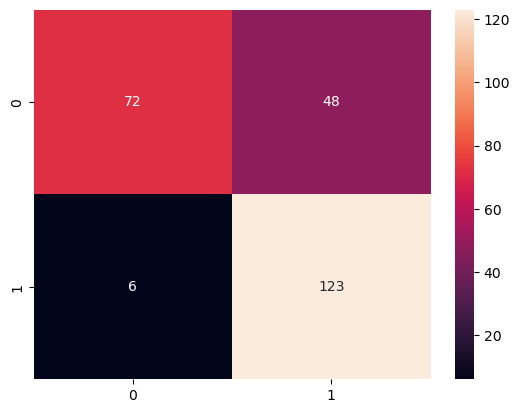

C:\Users\ASUS\AppData\Local\Temp\ipykernel_26488\1079121172.py:15: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "ro" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(range(1,20,2),score_list,'ro',color='blue', marker='o', markerfacecolor='red', markersize=10)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_26488\1079121172.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(range(1,20,2),score_list,'ro',color='blue', marker='o', markerfacecolor='red', markersize=10)


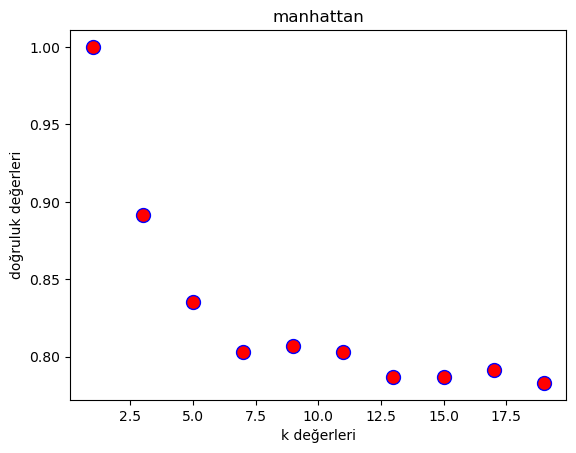

k=1 Uzaklık Yöntemi=chebyshev Doğruluk Değeri: 1.0 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       120
           2       1.00      1.00      1.00       129

    accuracy                           1.00       249
   macro avg       1.00      1.00      1.00       249
weighted avg       1.00      1.00      1.00       249



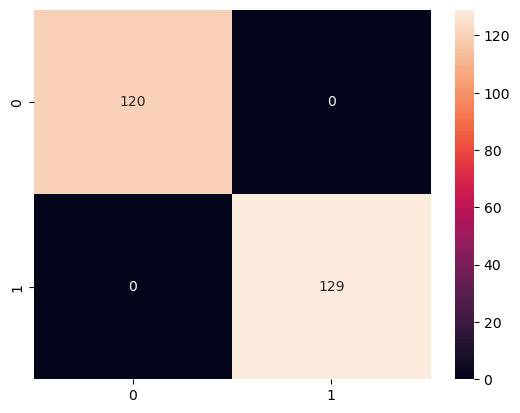

k=3 Uzaklık Yöntemi=chebyshev Doğruluk Değeri: 0.8875502008032129 
              precision    recall  f1-score   support

           1       0.94      0.82      0.88       120
           2       0.85      0.95      0.90       129

    accuracy                           0.89       249
   macro avg       0.90      0.89      0.89       249
weighted avg       0.89      0.89      0.89       249



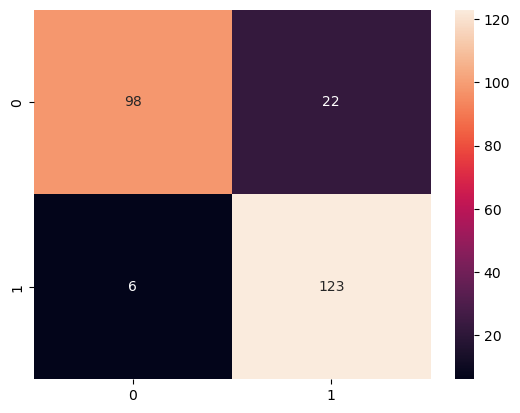

k=5 Uzaklık Yöntemi=chebyshev Doğruluk Değeri: 0.8313253012048193 
              precision    recall  f1-score   support

           1       0.94      0.69      0.80       120
           2       0.77      0.96      0.86       129

    accuracy                           0.83       249
   macro avg       0.86      0.83      0.83       249
weighted avg       0.85      0.83      0.83       249



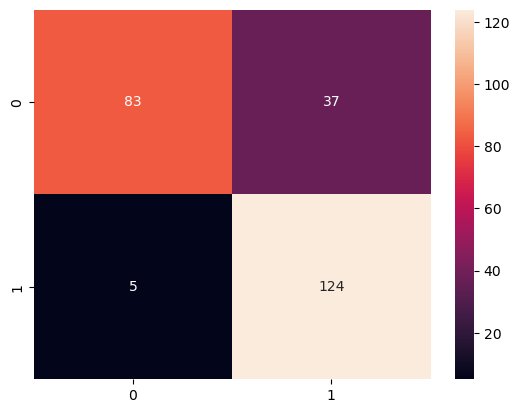

k=7 Uzaklık Yöntemi=chebyshev Doğruluk Değeri: 0.8393574297188755 
              precision    recall  f1-score   support

           1       0.95      0.70      0.81       120
           2       0.78      0.97      0.86       129

    accuracy                           0.84       249
   macro avg       0.87      0.83      0.83       249
weighted avg       0.86      0.84      0.84       249



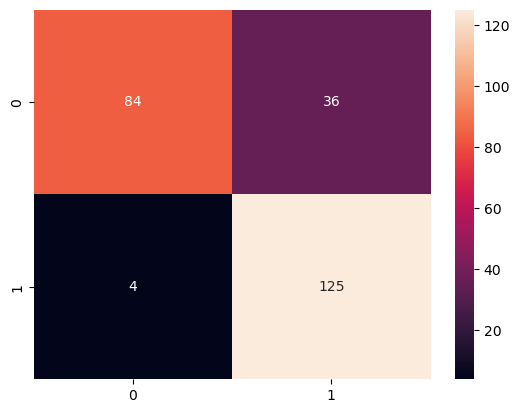

k=9 Uzaklık Yöntemi=chebyshev Doğruluk Değeri: 0.8353413654618473 
              precision    recall  f1-score   support

           1       0.98      0.68      0.80       120
           2       0.77      0.98      0.86       129

    accuracy                           0.84       249
   macro avg       0.87      0.83      0.83       249
weighted avg       0.87      0.84      0.83       249



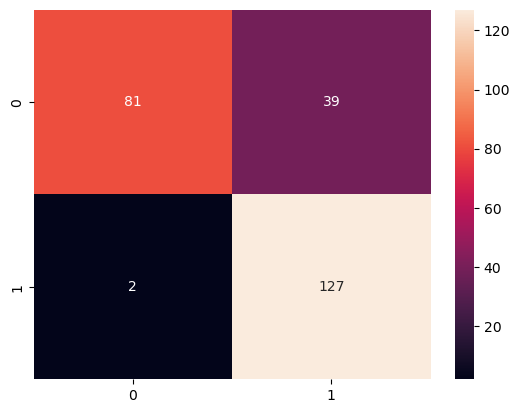

k=11 Uzaklık Yöntemi=chebyshev Doğruluk Değeri: 0.8152610441767069 
              precision    recall  f1-score   support

           1       0.94      0.66      0.77       120
           2       0.75      0.96      0.84       129

    accuracy                           0.82       249
   macro avg       0.85      0.81      0.81       249
weighted avg       0.84      0.82      0.81       249



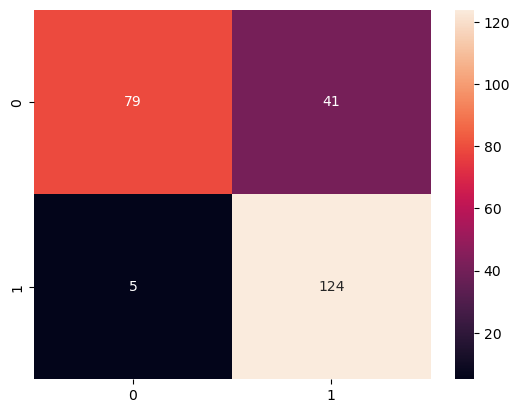

k=13 Uzaklık Yöntemi=chebyshev Doğruluk Değeri: 0.7791164658634538 
              precision    recall  f1-score   support

           1       0.89      0.62      0.73       120
           2       0.72      0.93      0.81       129

    accuracy                           0.78       249
   macro avg       0.81      0.77      0.77       249
weighted avg       0.80      0.78      0.77       249



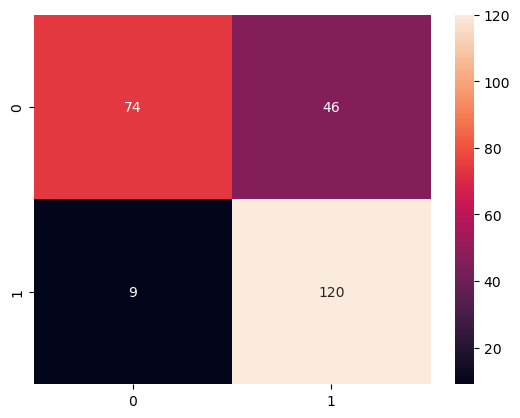

k=15 Uzaklık Yöntemi=chebyshev Doğruluk Değeri: 0.7751004016064257 
              precision    recall  f1-score   support

           1       0.90      0.60      0.72       120
           2       0.72      0.94      0.81       129

    accuracy                           0.78       249
   macro avg       0.81      0.77      0.77       249
weighted avg       0.80      0.78      0.77       249



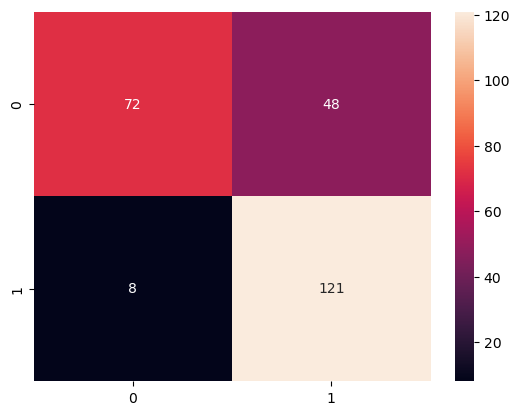

k=17 Uzaklık Yöntemi=chebyshev Doğruluk Değeri: 0.7751004016064257 
              precision    recall  f1-score   support

           1       0.89      0.61      0.72       120
           2       0.72      0.93      0.81       129

    accuracy                           0.78       249
   macro avg       0.80      0.77      0.77       249
weighted avg       0.80      0.78      0.77       249



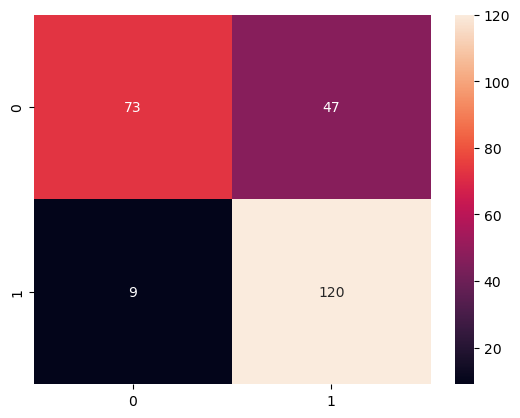

k=19 Uzaklık Yöntemi=chebyshev Doğruluk Değeri: 0.7751004016064257 
              precision    recall  f1-score   support

           1       0.91      0.59      0.72       120
           2       0.71      0.95      0.81       129

    accuracy                           0.78       249
   macro avg       0.81      0.77      0.77       249
weighted avg       0.81      0.78      0.77       249



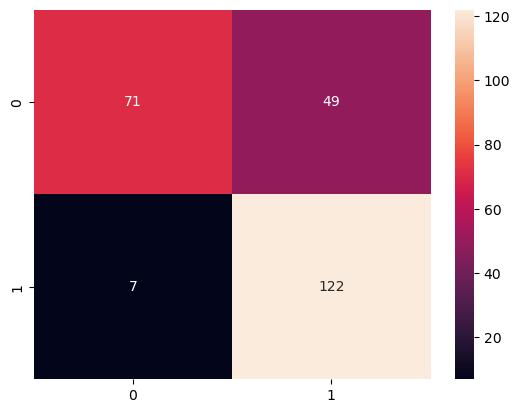

C:\Users\ASUS\AppData\Local\Temp\ipykernel_26488\1079121172.py:15: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "ro" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(range(1,20,2),score_list,'ro',color='blue', marker='o', markerfacecolor='red', markersize=10)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_26488\1079121172.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(range(1,20,2),score_list,'ro',color='blue', marker='o', markerfacecolor='red', markersize=10)


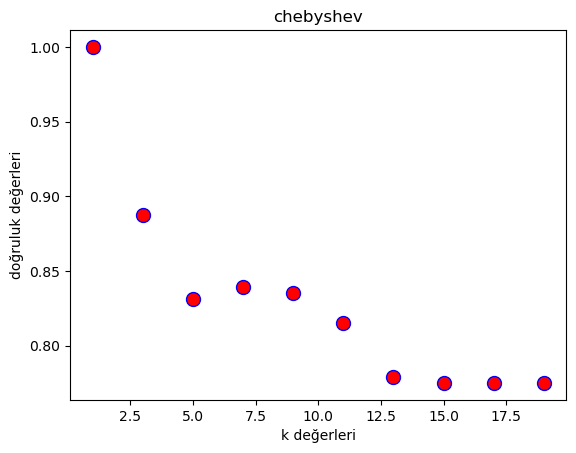

k=1 Uzaklık Yöntemi=minkowski Doğruluk Değeri: 1.0 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       120
           2       1.00      1.00      1.00       129

    accuracy                           1.00       249
   macro avg       1.00      1.00      1.00       249
weighted avg       1.00      1.00      1.00       249



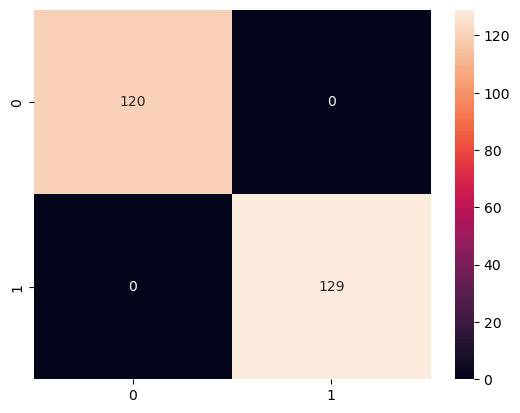

k=3 Uzaklık Yöntemi=minkowski Doğruluk Değeri: 0.8875502008032129 
              precision    recall  f1-score   support

           1       0.97      0.79      0.87       120
           2       0.83      0.98      0.90       129

    accuracy                           0.89       249
   macro avg       0.90      0.88      0.89       249
weighted avg       0.90      0.89      0.89       249



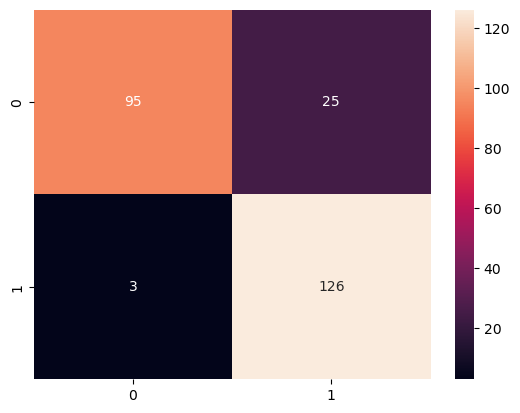

k=5 Uzaklık Yöntemi=minkowski Doğruluk Değeri: 0.8393574297188755 
              precision    recall  f1-score   support

           1       0.95      0.70      0.81       120
           2       0.78      0.97      0.86       129

    accuracy                           0.84       249
   macro avg       0.87      0.83      0.83       249
weighted avg       0.86      0.84      0.84       249



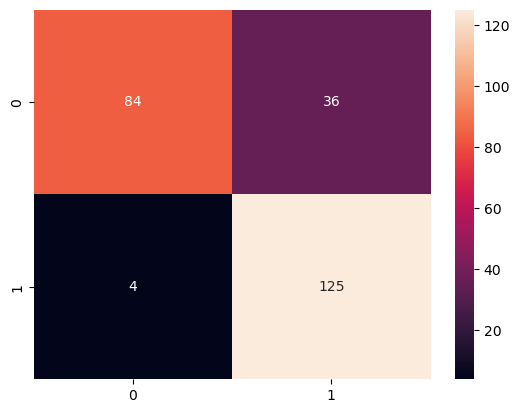

k=7 Uzaklık Yöntemi=minkowski Doğruluk Değeri: 0.8032128514056225 
              precision    recall  f1-score   support

           1       0.92      0.65      0.76       120
           2       0.74      0.95      0.83       129

    accuracy                           0.80       249
   macro avg       0.83      0.80      0.80       249
weighted avg       0.83      0.80      0.80       249



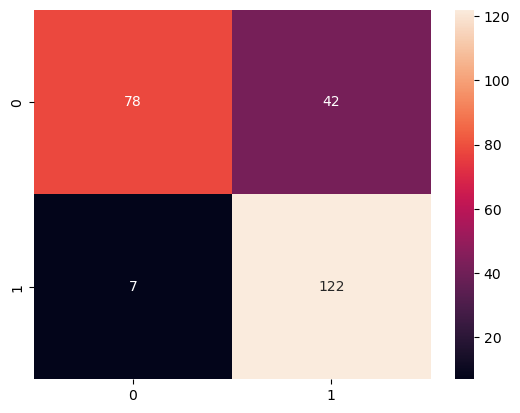

k=9 Uzaklık Yöntemi=minkowski Doğruluk Değeri: 0.8032128514056225 
              precision    recall  f1-score   support

           1       0.93      0.64      0.76       120
           2       0.74      0.95      0.83       129

    accuracy                           0.80       249
   macro avg       0.83      0.80      0.80       249
weighted avg       0.83      0.80      0.80       249



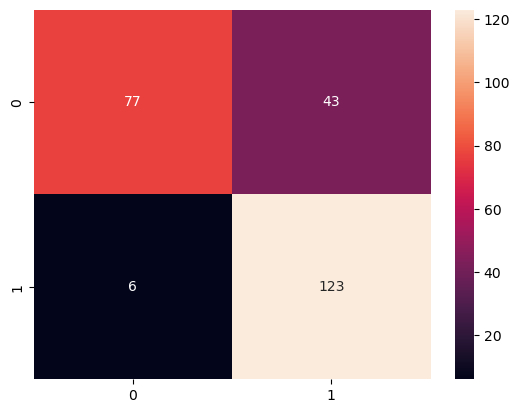

k=11 Uzaklık Yöntemi=minkowski Doğruluk Değeri: 0.8152610441767069 
              precision    recall  f1-score   support

           1       0.95      0.65      0.77       120
           2       0.75      0.97      0.84       129

    accuracy                           0.82       249
   macro avg       0.85      0.81      0.81       249
weighted avg       0.85      0.82      0.81       249



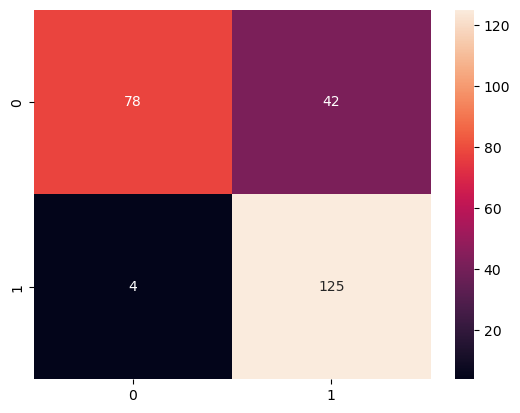

k=13 Uzaklık Yöntemi=minkowski Doğruluk Değeri: 0.8032128514056225 
              precision    recall  f1-score   support

           1       0.93      0.64      0.76       120
           2       0.74      0.95      0.83       129

    accuracy                           0.80       249
   macro avg       0.83      0.80      0.80       249
weighted avg       0.83      0.80      0.80       249



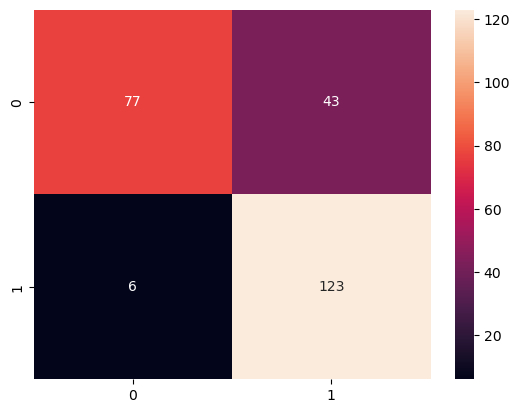

k=15 Uzaklık Yöntemi=minkowski Doğruluk Değeri: 0.8072289156626506 
              precision    recall  f1-score   support

           1       0.94      0.64      0.76       120
           2       0.74      0.96      0.84       129

    accuracy                           0.81       249
   macro avg       0.84      0.80      0.80       249
weighted avg       0.84      0.81      0.80       249



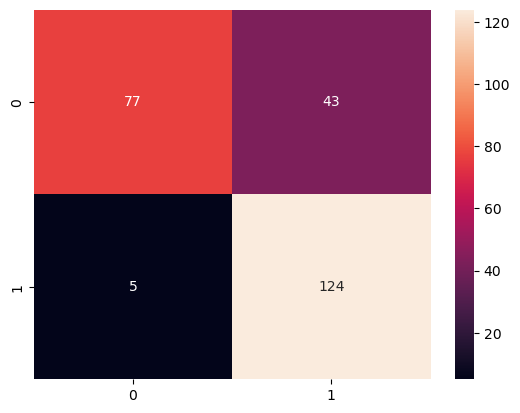

k=17 Uzaklık Yöntemi=minkowski Doğruluk Değeri: 0.7951807228915663 
              precision    recall  f1-score   support

           1       0.94      0.62      0.74       120
           2       0.73      0.96      0.83       129

    accuracy                           0.80       249
   macro avg       0.83      0.79      0.79       249
weighted avg       0.83      0.80      0.79       249



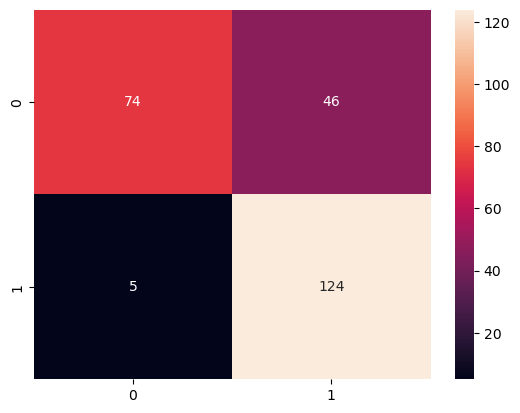

k=19 Uzaklık Yöntemi=minkowski Doğruluk Değeri: 0.7871485943775101 
              precision    recall  f1-score   support

           1       0.92      0.61      0.73       120
           2       0.72      0.95      0.82       129

    accuracy                           0.79       249
   macro avg       0.82      0.78      0.78       249
weighted avg       0.82      0.79      0.78       249



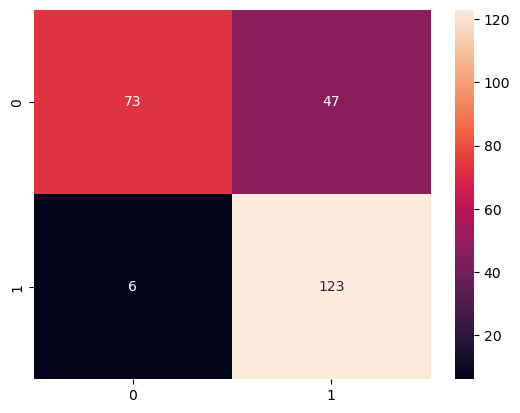

C:\Users\ASUS\AppData\Local\Temp\ipykernel_26488\1079121172.py:15: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "ro" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(range(1,20,2),score_list,'ro',color='blue', marker='o', markerfacecolor='red', markersize=10)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_26488\1079121172.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(range(1,20,2),score_list,'ro',color='blue', marker='o', markerfacecolor='red', markersize=10)


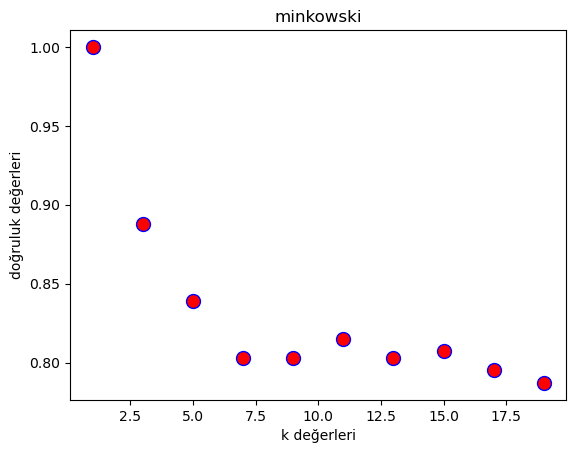

In [46]:
from sklearn.neighbors import KNeighborsClassifier
score_list = []
metric_list=['euclidean','manhattan','chebyshev','minkowski']
for mtrc in metric_list:
    for each in range(1,20,2):
        knn2 = KNeighborsClassifier(n_neighbors = each,metric=mtrc)
        knn2.fit(x_res,y_res)
        prediction = knn2.predict(x_test)
        score_list.append(knn2.score(x_test,y_test))
        cm = confusion_matrix(y_test,prediction)
        print("k={} Uzaklık Yöntemi={} Doğruluk Değeri: {} ".format(each,mtrc,knn2.score(x_test,y_test)))
        print(classification_report(y_test, prediction))
        sns.heatmap(cm,annot=True,fmt="d") 
        plt.show()
    plt.plot(range(1,20,2),score_list,'ro',color='blue', marker='o', markerfacecolor='red', markersize=10)
    plt.title(mtrc)
    plt.xlabel("k değerleri")
    plt.ylabel("doğruluk değerleri")
    plt.show()
    score_list.clear()


score:  0.7188755020080321
              precision    recall  f1-score   support

           1       0.92      0.46      0.61       120
           2       0.66      0.96      0.78       129

    accuracy                           0.72       249
   macro avg       0.79      0.71      0.70       249
weighted avg       0.78      0.72      0.70       249



<Axes: >

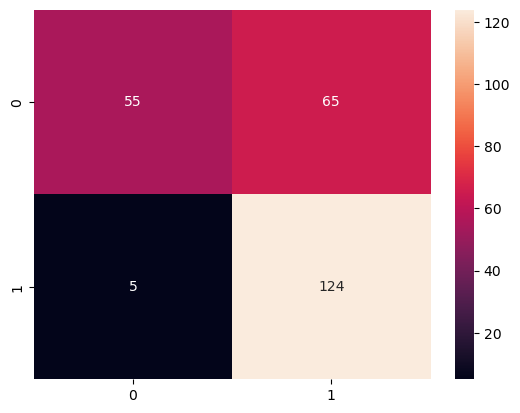

In [47]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
print("score: ",nb.score(x_test,y_test))
prediction = nb.predict(x_test)
cm = confusion_matrix(y_test,prediction)
print(classification_report(y_test, prediction))
sns.heatmap(cm,annot=True,fmt="d") 

{'C': 10, 'gamma': 'scale'}
score:  0.7590361445783133
              precision    recall  f1-score   support

           1       0.85      0.61      0.71       120
           2       0.71      0.90      0.79       129

    accuracy                           0.76       249
   macro avg       0.78      0.75      0.75       249
weighted avg       0.78      0.76      0.75       249



<Axes: >

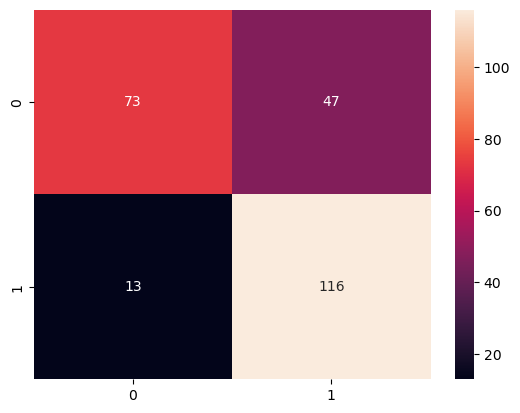

In [48]:
from sklearn.svm import SVC
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale','auto', 0.01, 0.1]
}
grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, cv=5)
grid.fit(x_train, y_train)
print(grid.best_params_)
svm=SVC(class_weight='balanced', C=grid.best_params_['C'], gamma=grid.best_params_['gamma'])
svm.fit(x_train,y_train)
print("score: ",svm.score(x_test,y_test))
prediction = svm.predict(x_test)
cm = confusion_matrix(y_test,prediction)
print(classification_report(y_test, prediction))
sns.heatmap(cm,annot=True,fmt="d") 

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


score:  0.7228915662650602
score:  0.7469879518072289
score:  0.7349397590361446
score:  0.7389558232931727
score:  0.7590361445783133
score:  0.7630522088353414
score:  0.7429718875502008
              precision    recall  f1-score   support

           1       0.89      0.58      0.70       120
           2       0.71      0.93      0.80       129

    accuracy                           0.76       249
   macro avg       0.80      0.76      0.75       249
weighted avg       0.79      0.76      0.75       249



<Axes: >

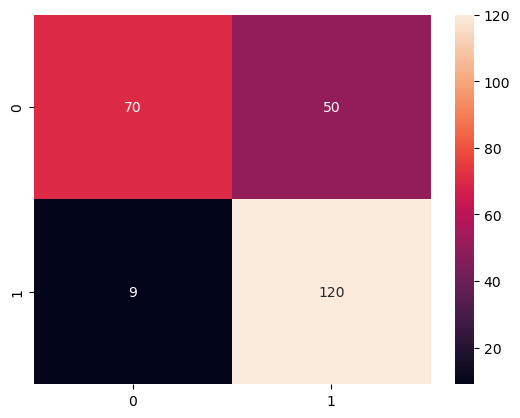

In [49]:
from sklearn.neural_network import MLPClassifier
list=[100, 500, 1000, 1500,2000,5000,10000]
mlpbest=0;
for i in list:
    mlp=MLPClassifier(max_iter=i)
    mlp.fit(x_train,y_train)
    print("score: ",mlp.score(x_test,y_test))
    if mlp.score(x_test,y_test)>mlpbest:
        fitmlp=mlp
        mlpbest=mlp.score(x_test,y_test)
prediction = fitmlp.predict(x_test)
cm = confusion_matrix(y_test,prediction)
print(classification_report(y_test, prediction))
sns.heatmap(cm,annot=True,fmt="d") 